Lo primero que se me ocurre que podría ayudar a resolver el problema, es conocer la mayor cantidad de atributos de cada propiedad, para poder diferenciar con mayor precisión una propiedad del resto.

<b>Posibles atributos de cada propiedad:</b>

<b>📍 Datos para cualquier tipo de propiedad 📍</b>
<ul>
    <li>Cantidad de ambientes</li>
    <li>m<sup>2</sup> cubiertos y descubiertos</li>
    <li>Ubicación geográfica</li>
    <li>Antigüedad de la propiedad</li>
    <li>Estado de las instalaciones</li>
    <li>Servicios y locaciones cercanos a la propiedad</li>
    <li>Valor del dolar al momento de la tasación</li>
</ul>

<b>🏢 Datos para departamentos 🏢 </b>
<ul>
    <li>Frente o contrafrente</li>
    <li>Amenities:</li>
        <ul>
            <li>Pileta</li>
            <li>Gimnasio</li>
            <li>Cantidad de estacionamientos</li>
            <li>Ascensor</li>
            <li>Terraza</li>
        </ul>
    <li>Seguridad</li>
</ul>
<b>🏡 Datos para casas 🏡</b>
<ul>
    <li>Jardín</li>
    <li>Pileta Incluída</li>
    <li>Seguridad (Si esta ubicada en un country)</li>
</ul>

Luego, también podrían haber otros tipos de propiedades como galpones, terrenos vacíos, complejos, etc. Por esto es que la categoría de la propiedad termina siendo una variable muy importante para terminar obteniendo el posible precio de la propiedad.<br><br> 
Además,sería importante conocer información sobre el proyecto como por ejemplo <b>tiempos de entrega</b> para saber cuanto tiempo dedicarle al desarrollo y a las pruebas. También es muy importante contar con un <b>modelo benchmark</b> contra el cual voy a comparar mi desarrollo.

## Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

El data set de propiedades de CABA

In [16]:
import os
os.getcwd()
os.listdir()
os.chdir("/Users")
os.chdir("./Matias/Desktop")

In [15]:
df = pd.read_csv('ar_properties.csv')
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,c4W28RqCW/NzxBe3mXw75w==,Propiedad,2019-12-24,2020-03-16,2019-12-24,-32.857933,-60.701782,Argentina,Santa Fe,Granadero Baigorria,...,2.0,342.0,279.0,24000.0,ARS,NaN,GRANADERO BAIGORRIA CASA EN BARRIO PARAISO - ...,GRANADERO BAIGORRIA: BARRIO PARAISO SUR: SANTA...,Casa,Alquiler
1,GTjUNVpTzcnp/l0J8jrr9w==,Propiedad,2019-12-24,2020-05-23,2019-12-24,-26.828682,-65.202642,Argentina,Tucumán,San Miguel de Tucumán,...,2.0,NaN,NaN,7500000.0,ARS,Mensual,EXCELENTE Departamento en microcentro - San Mi...,"En microcentro de San Miguel de Tucumán, excel...",Departamento,Venta
2,vlwOJQs57pPgpuB8041C6A==,Propiedad,2019-12-24,2020-01-08,2019-12-24,-34.593220,-58.441855,Argentina,Capital Federal,Villa Crespo,...,1.0,140.0,140.0,170000.0,USD,NaN,Departamento de 8 ambientes en Venta en Villa ...,Excelente Oficina o departamento de 180 metros...,Departamento,Venta
3,T6LpOCKI2g5e855v0taEYQ==,Propiedad,2019-12-24,2020-02-13,2019-12-24,-34.410167,-58.598547,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,...,9.0,450.0,450.0,295000.0,USD,NaN,Venta en Block 8 PHs Rincón de Milberg Tigre,IDEAL INVERSOR - VENTA EN BLOCK DE 8 PH CON RE...,PH,Venta
4,jQcy9AmUGNUcyWym4VPPzg==,Propiedad,2019-12-24,9999-12-31,2019-12-24,-31.291586,-64.292297,Argentina,Córdoba,NaN,...,2.0,NaN,200.0,319500.0,USD,Mensual,Casa - Cordoba Capital,IMPECABLE CASA DE 3 DORMITORIOS EN BARRIO CERR...,Casa,Venta


In [18]:
print('El dataset tiene', df.shape[0], 'filas y', df.shape[1], 'columnas.')

El dataset tiene 1000000 filas y 25 columnas.


Análisis de NaN

In [20]:
print('Valores faltantes por columna')

print(df.isna().sum())

Valores faltantes por columna
id                       0
ad_type                  0
start_date               0
end_date                 0
created_on               0
lat                 154773
lon                 156052
l1                       0
l2                       0
l3                   57250
l4                  783600
l5                  996163
l6                 1000000
rooms               524090
bedrooms            657308
bathrooms           223189
surface_total       510447
surface_covered     531476
price                47075
currency             49891
price_period        614527
title                   28
description             28
property_type            0
operation_type           0
dtype: int64


¿ Que tipo de propiedades hay? 

In [21]:
df.property_type.value_counts().index

Index(['Departamento', 'Otro', 'Casa', 'Lote', 'PH', 'Local comercial',
       'Oficina', 'Cochera', 'Depósito', 'Casa de campo'],
      dtype='object')

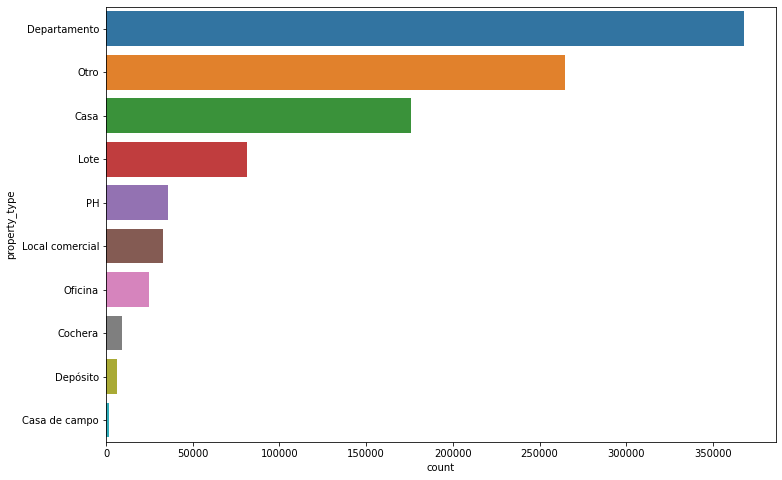

In [33]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y = 'property_type', data = df, order = df.property_type.value_counts().index)

Agregamos un Orden para que sea mas claro

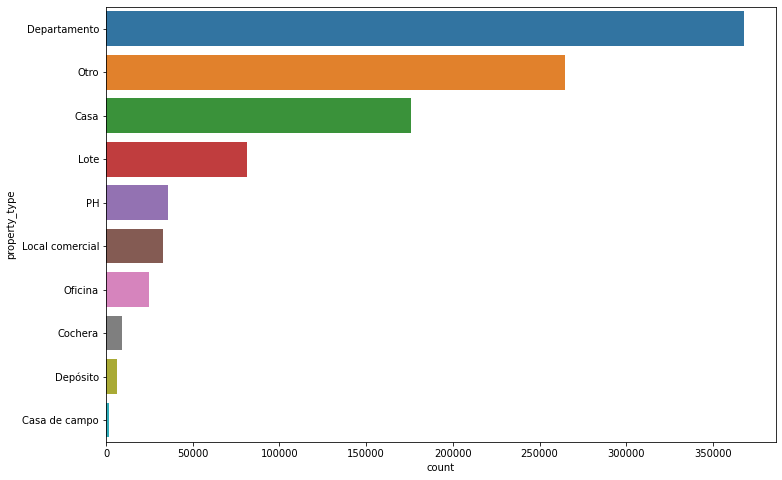

In [32]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y = 'property_type', data = df, order = df.property_type.value_counts().index)

### Los Barrios con Más publicaciones

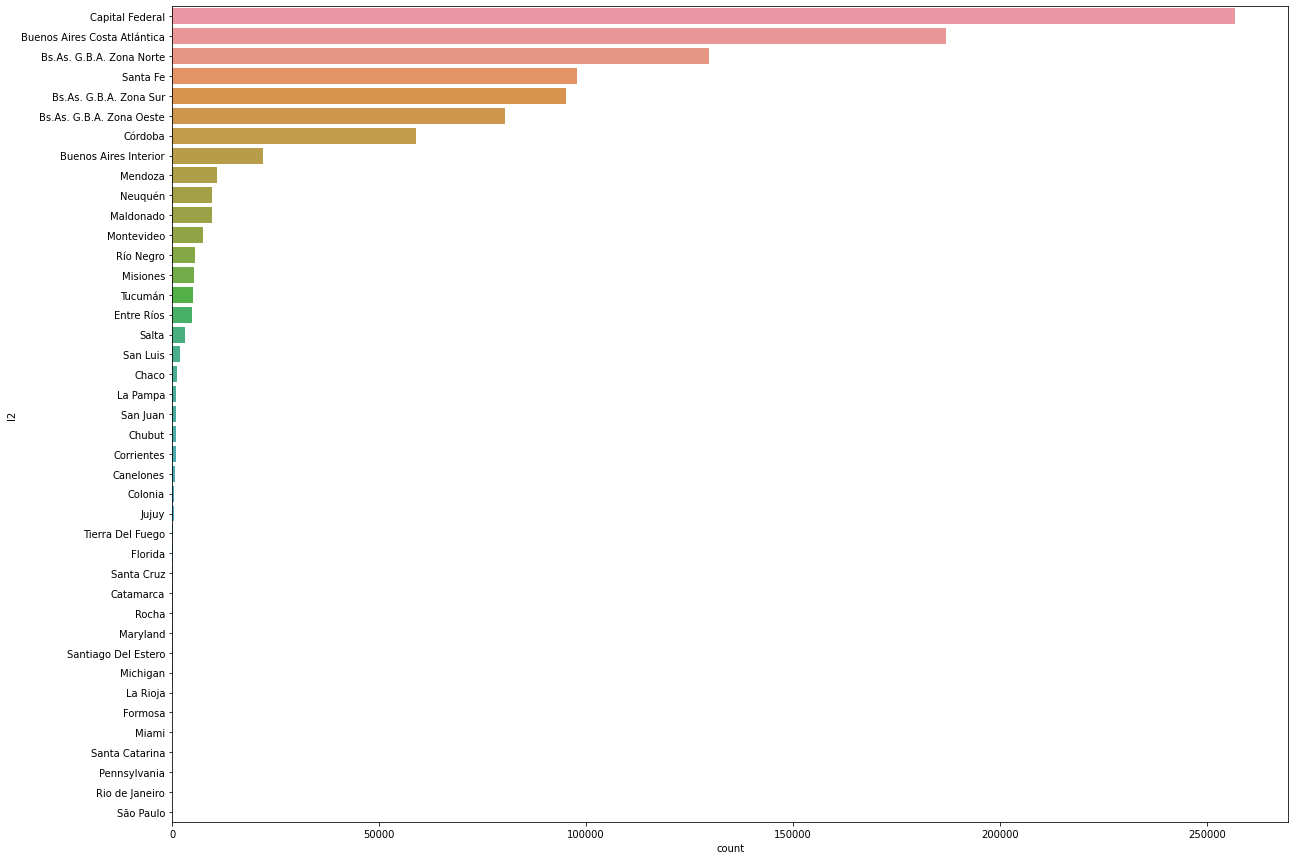

In [44]:
fig, ax = plt.subplots(figsize = (20,15))
sns.countplot(y = 'l2', data = df, order = df.l2.value_counts().index)

In [ ]:
df["l2"==]

Text(0.0, 1.0, 'Recuento de publicaciones por barrio (l3)')

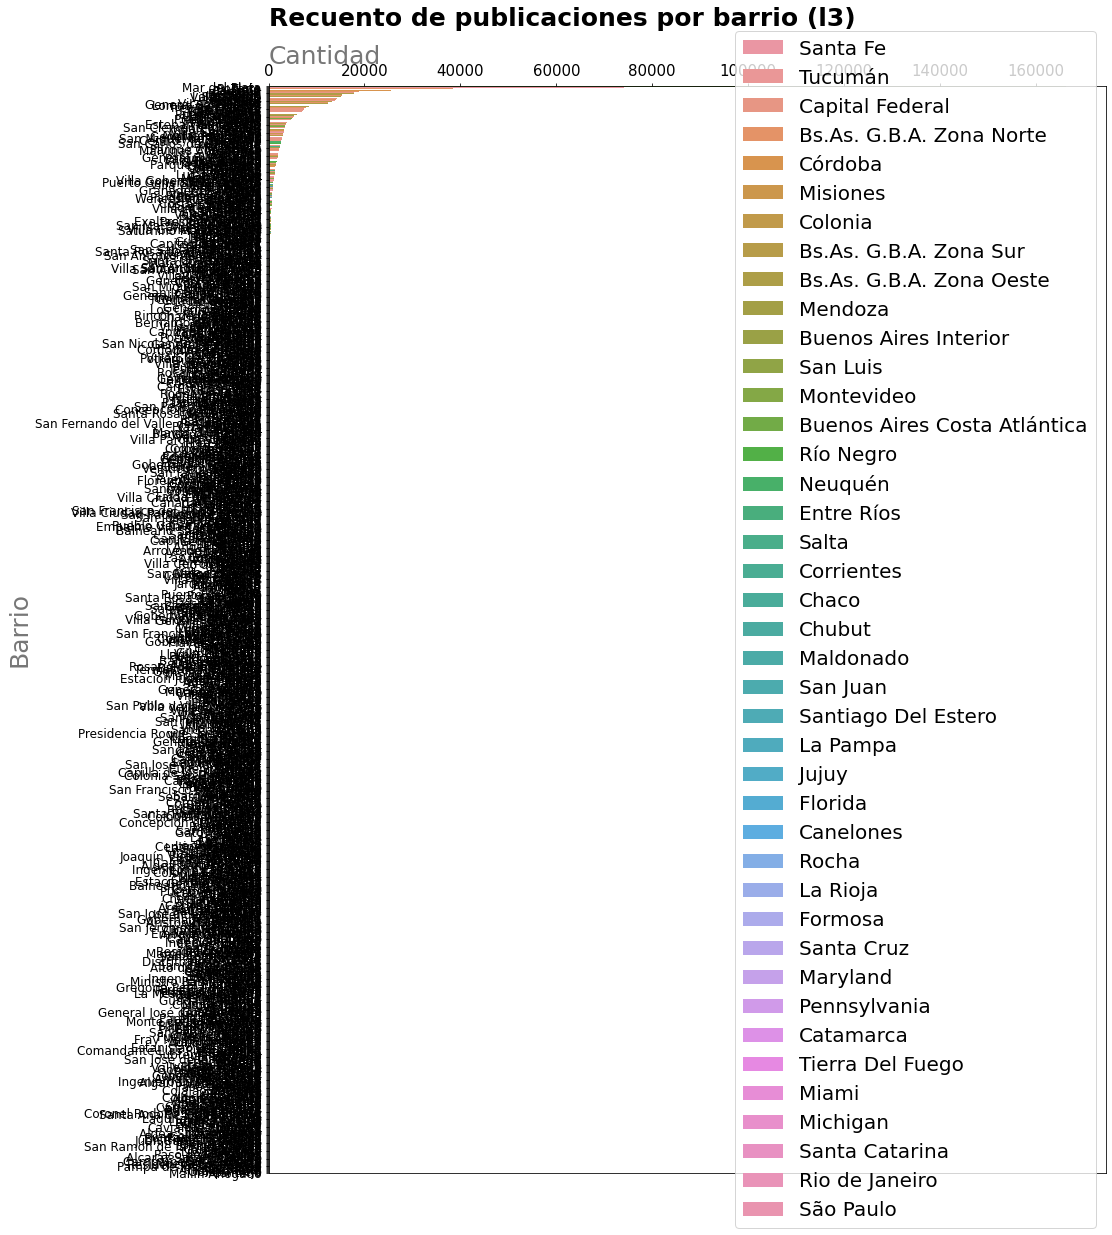

In [68]:
#plt.subplot2grid((4,3),(1,0), colspan = 3, rowspan = 3)
fig, ax = plt.subplots(figsize = (15,20))
sns.countplot(y = 'l3', data = df, hue = 'l2', dodge  = False, order = df.l3.value_counts().index )
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=12)
plt.legend(loc = 'center right', fontsize = 20)
ax.xaxis.set_ticks_position('top')
plt.ylabel('Barrio', size = 25, color='#777777')
ax.set_xlabel('')
ax.text(0, 1.02, 'Cantidad', transform=ax.transAxes, size=25, color='#777777')
plt.title('Recuento de publicaciones por barrio (l3)', size = 25, weight=600, pad = 60, loc = 'left')


###  Vamos a filtrar el DataSet
---
Nos quedamos con el tipo de departamento más común y el barrio mas importante.

In [46]:
mask = (df.property_type.isin(['Departamento','PH','Casa'])) &  (df.l2 == 'Capital Federal')
#& df.l2 == 'Capital Federal'
df_cf = df[mask]
df_cf.shape

(182518, 25)

In [16]:
df_cf.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [17]:
df_cf.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


### ¿Cómo se paga en Capital? 

In [18]:
df_cf.currency.value_counts()

USD    91485
Name: currency, dtype: int64

In [19]:
df_cf.operation_type.value_counts()

Venta    91485
Name: operation_type, dtype: int64

### Recortamos el DataSet 

In [ ]:
df_cf.drop(['lon','lat', 'start_date','end_date','created_on','l1', 'currency', 'operation_type', 'l2', 'id', 'ad_type'],1, inplace = True)

In [51]:
df_cf.head()

,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_period,title,description,property_type
2,Villa Crespo,NaN,NaN,NaN,8.0,7.0,1.0,140.0,140.0,170000.0,NaN,Departamento de 8 ambientes en Venta en Villa ...,Excelente Oficina o departamento de 180 metros...,Departamento
49,Caballito,NaN,NaN,NaN,NaN,NaN,1.0,39.0,39.0,20000.0,NaN,Felipe Vallese 700 - $ 20.000 - Departamento ...,Torres Caballito Nuevo cuenta con una completí...,Departamento
50,Tribunales,NaN,NaN,NaN,NaN,NaN,1.0,24.0,24.0,11000.0,NaN,Tribunales - Parana 400 Departamento amoblad...,Parana 400 Planta BajaEdificio con seguridad24...,Departamento
51,Parque Chas,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,70000.0,NaN,Av De Los Incas 4700 - U$D 70.000 - Departame...,"MONOAMBIENTE A ESTRENAR CON BALCON, TOTALMENTE...",Departamento
331,Almagro,NaN,NaN,NaN,NaN,NaN,1.0,45.0,40.0,130000.0,NaN,Av. La Plata 400 5° - U$D 130.000 - Departam...,Excelente monoambiente divisible en 5º piso al...,Departamento


<p style="font-size:20px">  Realizo una primera observación de la distribución de la variable <b><i>surface_total</b></i></p>

Text(0.5, 1.0, 'Distribución de la superficie total')

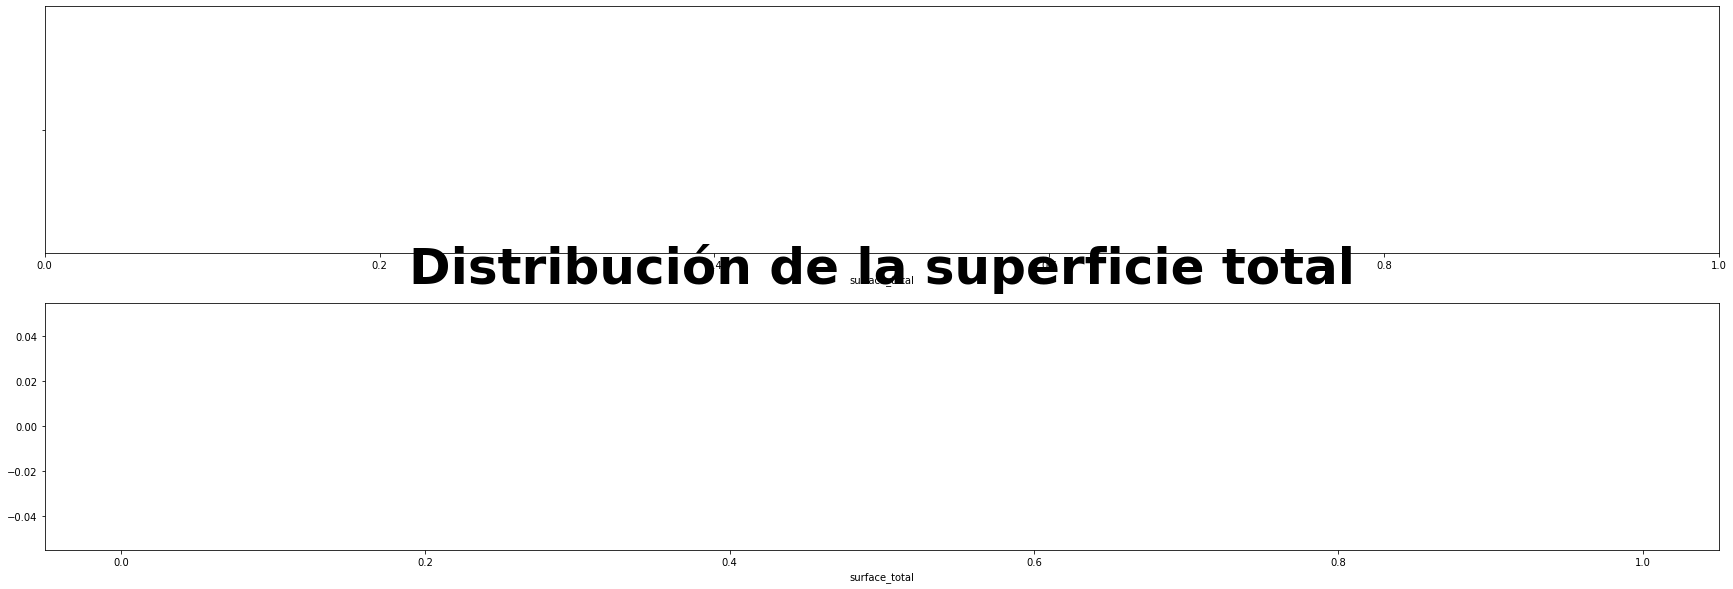

In [66]:
plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(df_cf['surface_total'])
plt.xlabel("")
plt.title('Distribución de la superficie total', weight=600, size = 50, pad = 20)
plt.subplot(2,1,2)
sns.distplot(df_cf['surface_total'], kde = False)
plt.xlabel('Superficie Total [$m^{2}$]', size = 25, color='#777777')
plt.show()

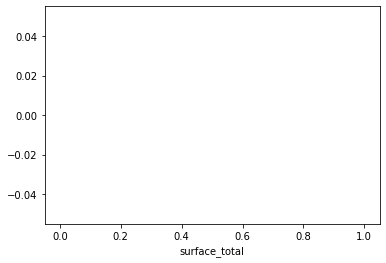

In [64]:
sns.distplot(df_cf['surface_total'], kde = False)

<p style="font-size:20px"> Veo algunos outliers que me están dificultando una correcta visualización del gráfico así que procedo a fitlrarlos. Para esto, voy a usar el cuantil 0.99. </p>

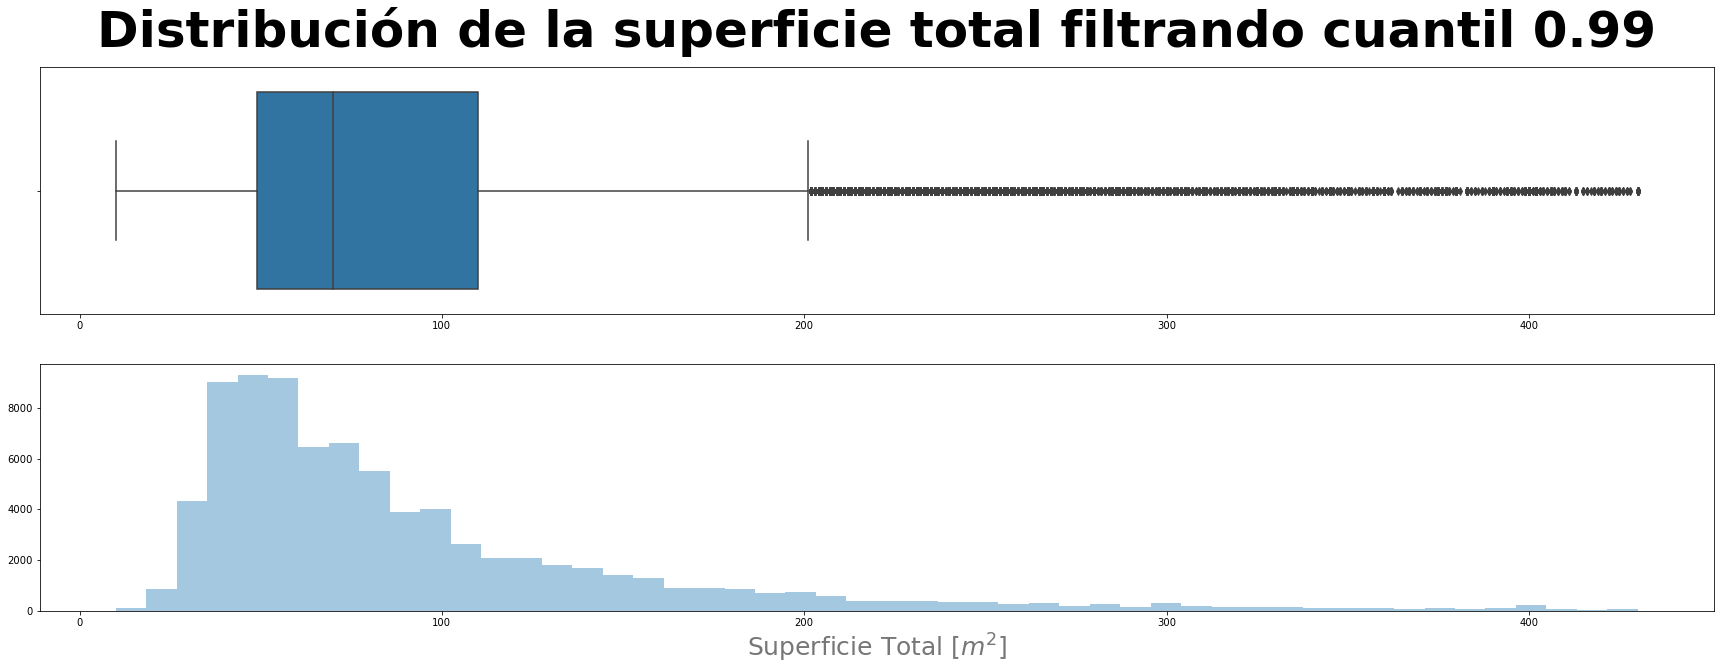

In [23]:
mask_q = df_cf['surface_total'] < df_cf['surface_total'].quantile(0.99)


plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(df_cf['surface_total'][mask_q])
plt.xlabel("")
plt.title('Distribución de la superficie total filtrando cuantil 0.99', weight=600, size = 50, pad = 20)

plt.subplot(2,1,2)
sns.distplot(df_cf['surface_total'][mask_q], kde = False)
plt.xlabel('Superficie Total [$m^{2}$]', size = 25, color='#777777')

plt.show()

<p style="font-size:20px"> Como siguen habiendo bastantes outliers, voy a aplicar un filtro usando el cuantil 0.95. </p>

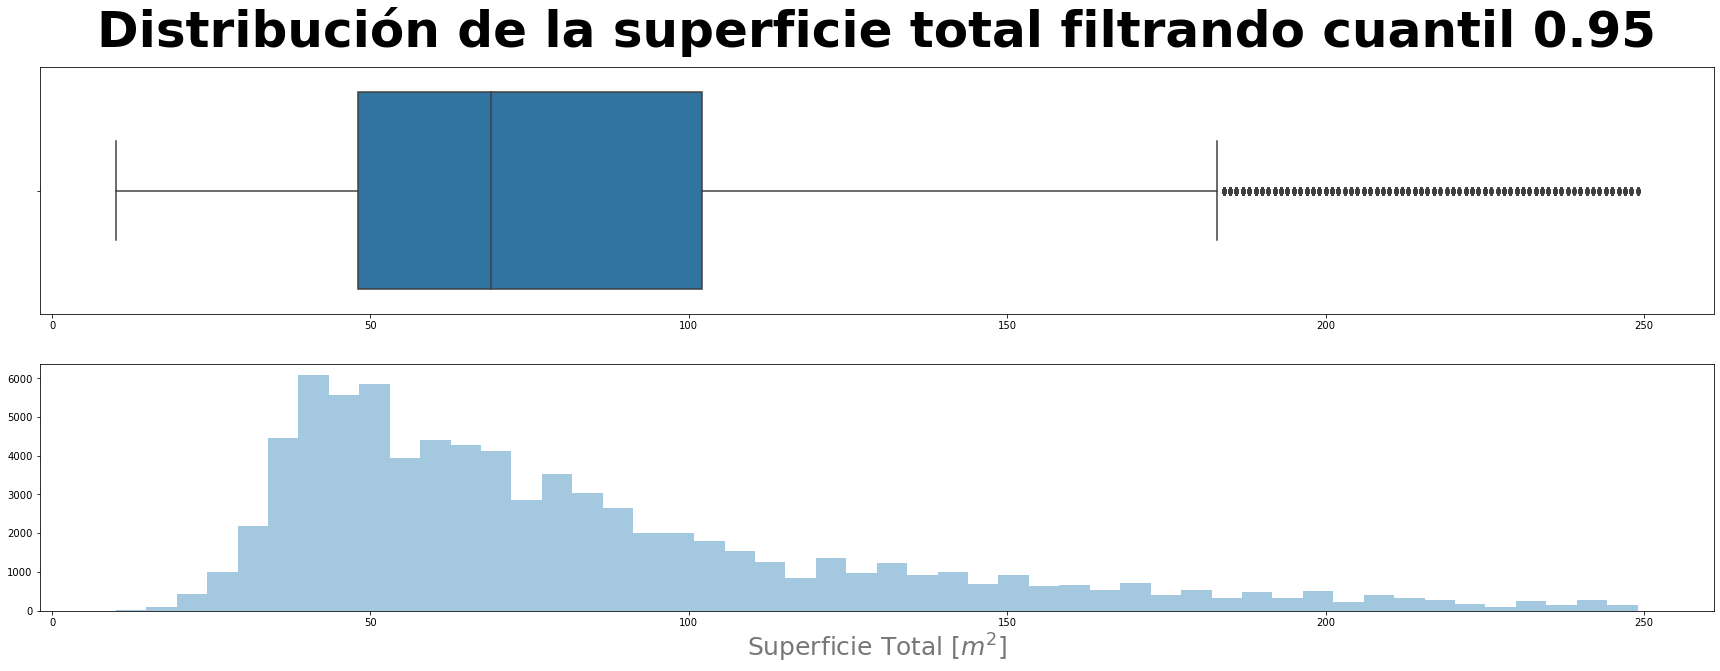

In [24]:
mask_q = df_cf['surface_total'] < df_cf['surface_total'].quantile(0.95)


plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(df_cf['surface_total'][mask_q])
plt.xlabel("")
plt.title('Distribución de la superficie total filtrando cuantil 0.95', weight=600, size = 50, pad = 20)
#ax.tick_params(axis="x", labelsize=15)
plt.subplot(2,1,2)
sns.distplot(df_cf['surface_total'][mask_q], kde = False)
plt.xlabel('Superficie Total [$m^{2}$]', size = 25, color='#777777')
plt.savefig('Dist_sup_total_q95.png')
plt.show()

In [25]:
df_cf = df_cf[mask_q]

In [26]:
df_cf.shape

(78437, 10)

<p style="font-size:20px"> Vamos a investigar los valores mínimos de <b><i>surface_total</b></i>. </p>

In [27]:
df_cf.nsmallest(5, ['surface_total'])

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
73182,Villa Lugano,2.0,1.0,1.0,10.0,45.0,220000.0,Venta PH en Villa Lugano Capital Federal Piedr...,"PH en Venta, Ph de 2 ambientes al frente con l...",PH
132438,Belgrano,3.0,2.0,1.0,10.0,78.0,160000.0,Venta Belgrano 3-4 ambientes planta baja 87 me...,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,Departamento
48635,Palermo,3.0,1.0,1.0,11.0,60.0,158000.0,Luminoso PH 3 ambientes en Palermo Soho,Corredor Responsable: Flavia Aguirre - CUCICBA...,PH
57085,Parque Chacabuco,2.0,1.0,1.0,11.0,73.0,161900.0,Venta 2 amb estrenar cochera ameneties P.Chaca...,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento
89351,Barrio Norte,4.0,3.0,2.0,11.0,125.0,476000.0,Venta depto 4 ambIentes SEMIPISO B.NORTE,Corredor Responsable: Jorge Salafia - CUCICBA ...,Departamento


<p style="font-size:20px">  Se puede observar que hay valores de <b><i>surface_total</b></i> que son menores a <b><i>surface_covered</b></i> en la misma instancia, lo cual no tiene sentido. Por esto, voy a eliminar las propiedades que cumplen esta condición.</p>

In [28]:
mask_surface = df_cf['surface_covered'] <= df_cf['surface_total']

df_cf = df_cf[mask_surface]

In [29]:
df_cf.shape

(77223, 10)

<p style="font-size:20px"> Volvemos a observar los valores mínimos para <b><i>surface_total</b></i>. </p>

In [30]:
df_cf.nsmallest(15, ['surface_total'])

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
92326,San Telmo,1.0,1.0,NaN,12.0,12.0,13000.0,Cochera a metros de AV 9 De Julio y Independencia,Corredor Responsable: JUAN FRANCISCO CARATTINO...,Departamento
20534,Belgrano,1.0,1.0,1.0,13.0,13.0,39000.0,1 ambiente OPORTUNIDAD,OPORTUNIDAD 1 AMBIENTE<br>3 Piso por escalera<...,Departamento
28391,Liniers,1.0,1.0,1.0,13.0,13.0,12000.0,OPORTUNIDAD DE INVERSION !,** SE VENDE **REAL OPORTUNIDAD !! IDEAL PARA I...,Departamento
28392,Liniers,1.0,1.0,1.0,13.0,13.0,12000.0,OPORTUNIDAD DE INVERSION !,** SE VENDE **REAL OPORTUNIDAD !! IDEAL PARA I...,Departamento
28393,Liniers,1.0,1.0,1.0,13.0,13.0,12000.0,OPORTUNIDAD DE INVERSION !,** SE VENDE **REAL OPORTUNIDAD !! IDEAL PARA I...,Departamento
28394,Liniers,1.0,1.0,1.0,13.0,13.0,12000.0,OPORTUNIDAD DE INVERSION !,** SE VENDE **REAL OPORTUNIDAD !! IDEAL PARA I...,Departamento
28395,Liniers,1.0,1.0,1.0,13.0,13.0,12000.0,OPORTUNIDAD DE INVERSION !,** SE VENDE **REAL OPORTUNIDAD !! IDEAL PARA I...,Departamento
360,Caballito,1.0,1.0,NaN,14.0,14.0,27000.0,"EXCELENTE COCHERA, EXCELENTE INVERSION !",Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento
23369,Pompeya,1.0,1.0,1.0,14.0,14.0,27900.0,Trole 400 Nueva Pompeya 1amb U$27.900 Apto Prof,Apto profesional. Monoambiente al contrafrente...,Departamento
33085,Pompeya,1.0,1.0,1.0,14.0,14.0,27900.0,Venta. Monoambiente. Apto Profesional. Trole y...,CARACTERÍSTICAS- Ambientes: 1- Superficie Tota...,Departamento


<p style="font-size:20px"> Primero, veo que hay propiedades con valores muy bajos de superficie total. Luego de consultarlo con un arquitecto, me explicó que esos valores podrían llegar a corresponder a un concepto llamado "micro ambientes" (El cual es poco común en Argentina pero más normal en Europa).</p>

In [31]:
df_cf.title = df_cf.title.str.lower()

In [32]:
df_cf[df_cf['title'].str.contains("cochera")].sort_values('surface_total').head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
92326,San Telmo,1.0,1.0,NaN,12.0,12.0,13000.0,cochera a metros de av 9 de julio y independencia,Corredor Responsable: JUAN FRANCISCO CARATTINO...,Departamento
360,Caballito,1.0,1.0,NaN,14.0,14.0,27000.0,"excelente cochera, excelente inversion !",Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento
88305,Caballito,1.0,1.0,1.0,18.0,18.0,12500.0,cochera cubierta muy bien ubicada,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento
88304,Caballito,1.0,1.0,1.0,18.0,18.0,12500.0,cochera cubierta en la mejor ubicación,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento
38398,Nuñez,1.0,1.0,1.0,20.0,20.0,113000.0,venta monoambiente con cochera en nuñez,Corredor Responsable: MAURO MARVISI - CSI 5574...,Departamento


<p style="font-size:20px"> Después de hacer una observación más profunda sobre las instancias con los valores muy bajos de <b><i>surface_total</b></i>, descubrí que algunas de estas propiedades tenían un valor <b><i>NaN</b></i> en la columna <b><i>bathrooms</b></i>, lo que podrìa indicar que estas no serían un Departamento (Como estaba indicado en la columna <b><i>property_type</b></i>).<br><br>
Observando la columna <b><i>title</b></i> de estas propiedades observé que algunas de estas eran cocheras, lo cual le daba un sentido concreto al valor de su <b><i>surface_total</b></i>.
<br><br>
Observando estos valores entonces, se descartan las instancias que tienen un valor menor a 20 en la columna de <b><i>surface_total</b></i> </p>

In [33]:
mask_st = df_cf.surface_total >= 20
df_cf = df_cf[mask_st]
df_cf.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,77149.000000,77149.000000,76368.000000,77149.000000,77149.000000,7.714900e+04
mean,2.878313,1.907335,1.479743,82.288649,72.533137,2.281898e+05
std,1.126550,0.942538,0.751955,45.955651,39.794703,2.202731e+05
min,1.000000,0.000000,1.000000,20.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,44.000000,1.220000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.730000e+05
75%,4.000000,3.000000,2.000000,102.000000,89.000000,2.630000e+05
max,21.000000,15.000000,14.000000,249.000000,249.000000,3.243423e+07


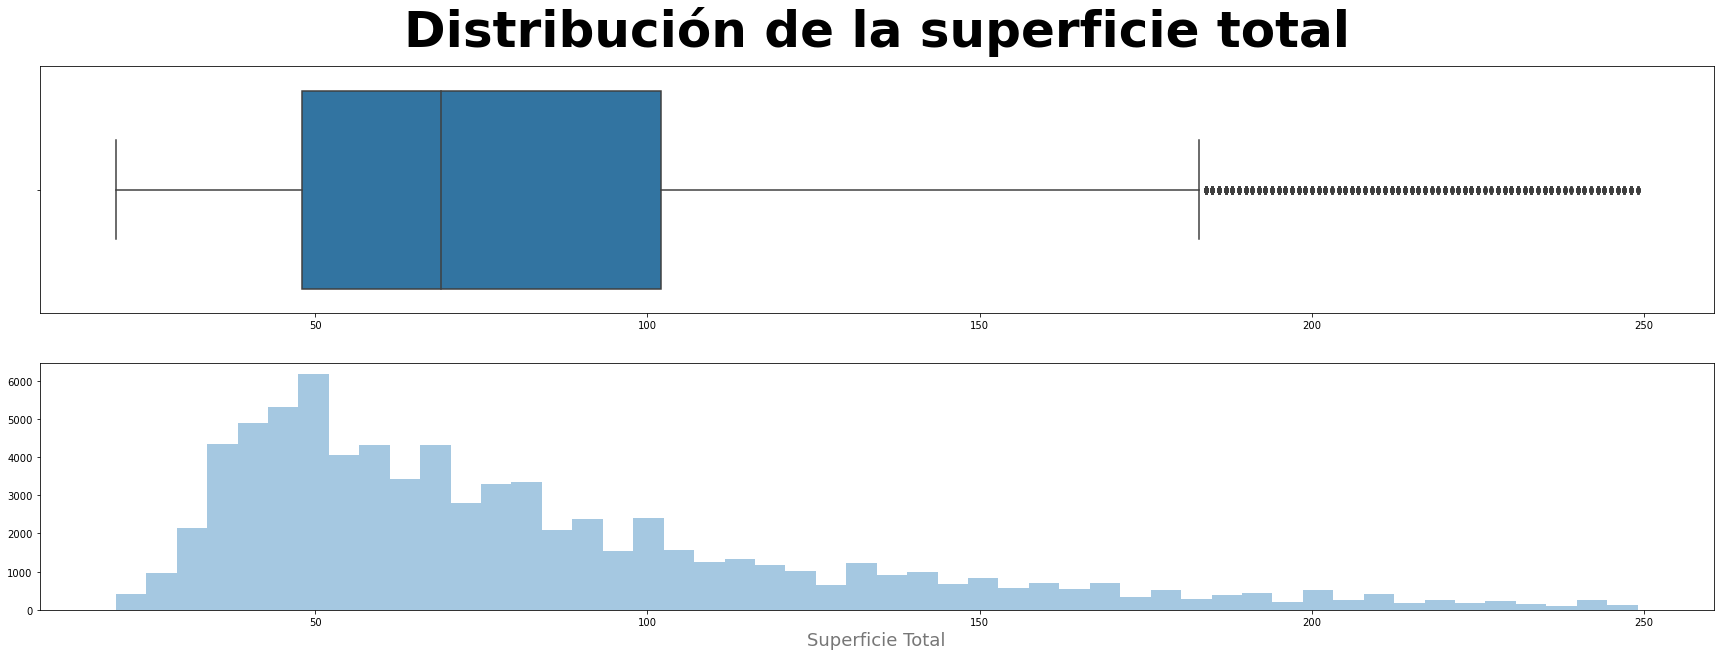

In [34]:
plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(df_cf['surface_total'])
plt.xlabel("")
plt.title('Distribución de la superficie total', weight=600, size = 50, pad = 20)
plt.subplot(2,1,2)
sns.distplot(df_cf['surface_total'], kde = False)
plt.xlabel('Superficie Total', size = 18, color='#777777')

plt.show()

<p style="font-size:20px">Ahora vemos la distribución de los precios de las propiedades con la variable <b><i>price</b></i>: </p>

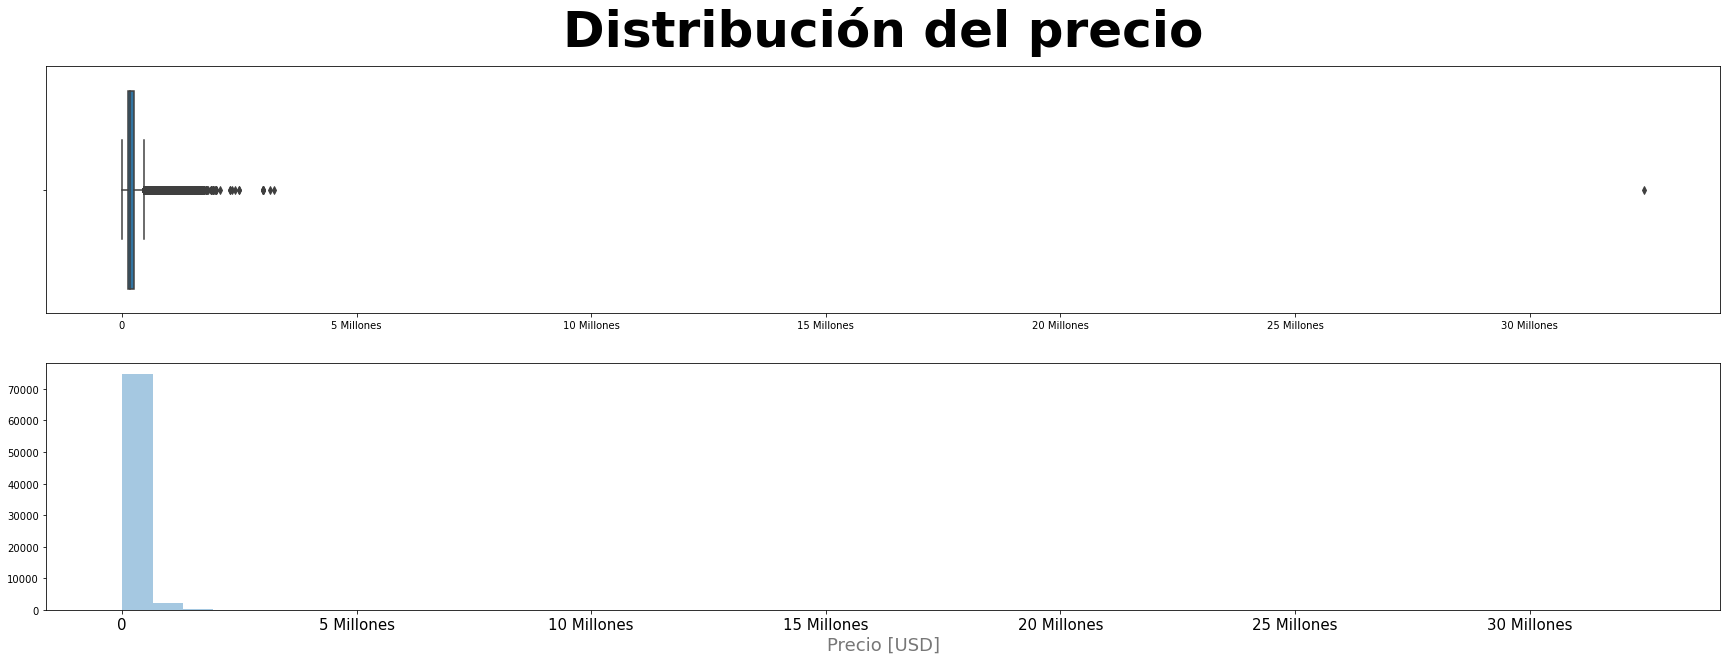

In [35]:
plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(df_cf.price)
plt.xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000], labels = ['0', '5 Millones','10 Millones','15 Millones','20 Millones','25 Millones', '30 Millones'])
plt.title('Distribución del precio', weight=600, size = 50, pad = 20)
#plt.ticklabel_format(style='plain', axis='x')  #Con esta línea puedo sacar la notación científica pero no me sirve si elijo manualmente las labels del xtick
plt.xlabel("")

plt.subplot(2,1,2)
sns.distplot(df_cf.price, kde = False)
plt.xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000], labels = ['0', '5 Millones','10 Millones','15 Millones','20 Millones','25 Millones', '30 Millones'], size = 15)
plt.xlabel('Precio [USD]', size = 18, color='#777777')

plt.show()

<p style="font-size:20px">Se ve que hay algunos valores extremos que nos dificultan la visualización, ahora usamos el cuantil 0.90.</p>

In [36]:
mask_p = df_cf['price'] < df_cf['price'].quantile(0.90)
df_cf = df_cf[mask_p]

In [37]:
df_cf.shape

(69373, 10)

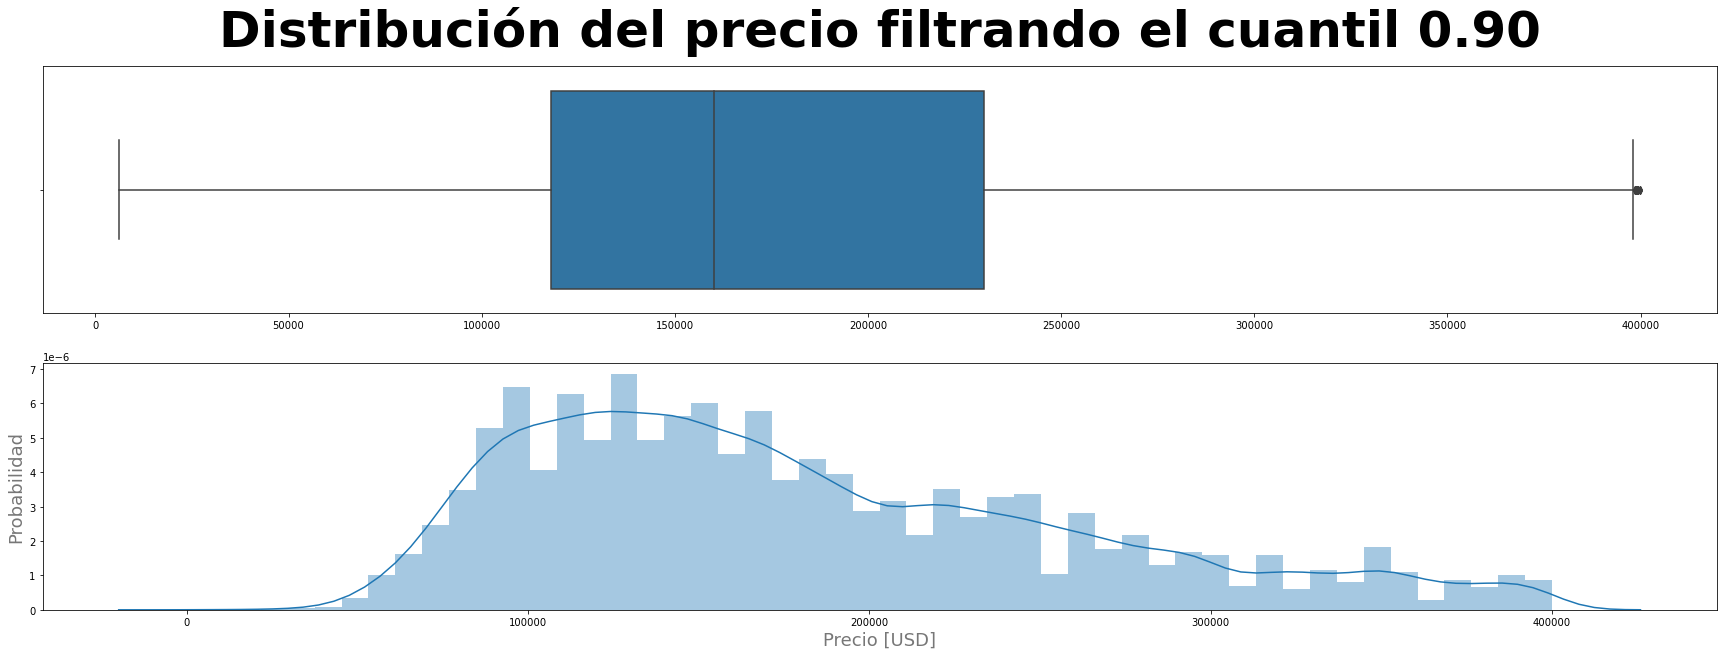

In [38]:
plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(df_cf.price)
#plt.xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000], labels = ['0', '5 Millones','10 Millones','15 Millones','20 Millones','25 Millones', '30 Millones'])
#plt.ticklabel_format(style='plain', axis='x')  #Con esta línea puedo sacar la notación científica pero no me sirve si elijo manualmente las labels del xtick
plt.xlabel("")
plt.title('Distribución del precio filtrando el cuantil 0.90', weight=600, size = 50, pad = 20)
plt.subplot(2,1,2)
sns.distplot(df_cf.price, kde = True, hist = True)

#plt.xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000], labels = ['0', '5 Millones','10 Millones','15 Millones','20 Millones','25 Millones', '30 Millones'], size = 15)
plt.xlabel('Precio [USD]', size = 18, color='#777777')
plt.ylabel('Probabilidad', size = 18, color='#777777')
plt.savefig('Dist_precio_q90.png')
plt.show()

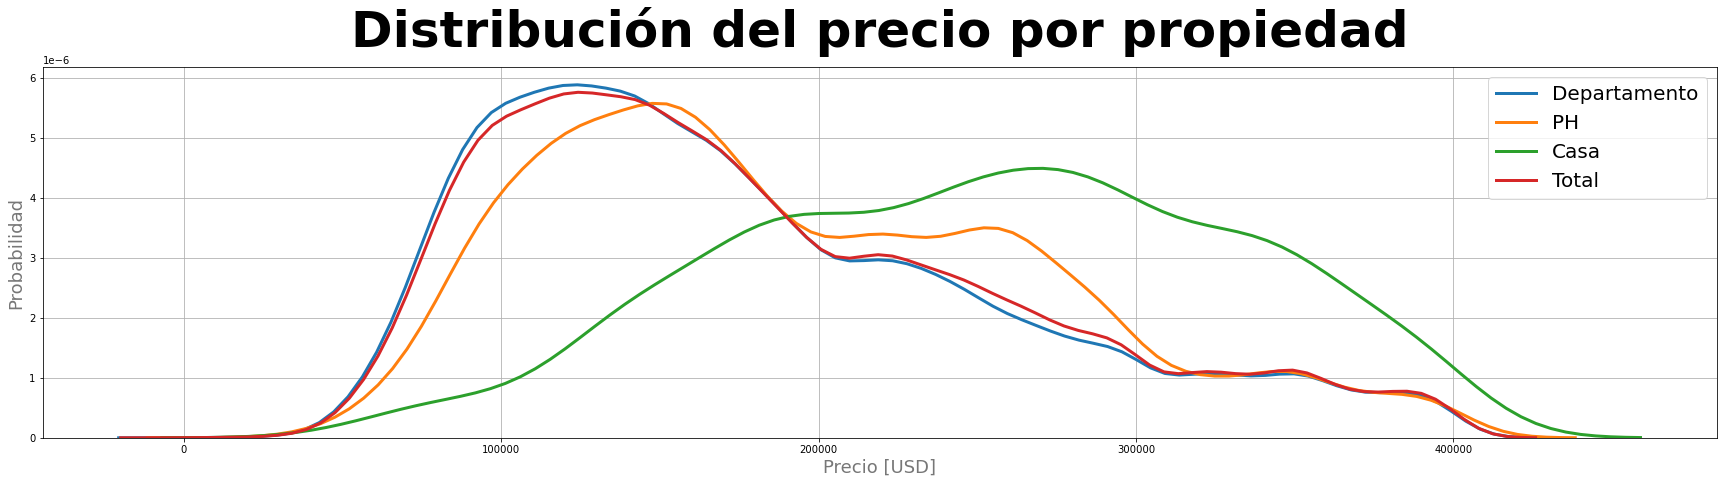

In [42]:
plt.figure(figsize = (30,15))


#plt.xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000], labels = ['0', '5 Millones','10 Millones','15 Millones','20 Millones','25 Millones', '30 Millones'])
#plt.ticklabel_format(style='plain', axis='x')  #Con esta línea puedo sacar la notación científica pero no me sirve si elijo manualmente las labels del xtick
plt.xlabel("")
plt.title('Distribución del precio filtrando cuantil 90', size = 50, pad = 20)
plt.subplot(2,1,2)
sns.distplot(df_cf.price[df_cf.property_type == 'Departamento'], 
             kde = True, 
             hist = False, 
             label = 'Departamento', 
             kde_kws = {'linewidth': 3})
sns.distplot(df_cf.price[df_cf.property_type == 'PH'],
             kde = True, 
             hist = False, 
             label = 'PH', 
             kde_kws = {'linewidth': 3})
sns.distplot(df_cf.price[df_cf.property_type == 'Casa'], 
             kde = True, 
             hist = False, 
             label = 'Casa', 
             kde_kws = {'linewidth': 3})
sns.distplot(df_cf.price, 
             kde = True, 
             hist = False, 
             label = 'Total', 
             kde_kws = {'linewidth': 3})
plt.title('Distribución del precio por propiedad', weight=600, size = 50, pad = 20)
#plt.xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000], labels = ['0', '5 Millones','10 Millones','15 Millones','20 Millones','25 Millones', '30 Millones'], size = 15)
plt.xlabel('Precio [USD]', size = 18, color='#777777')
plt.ylabel('Probabilidad', size = 18, color='#777777')
plt.legend(fontsize = 20)
plt.grid()
plt.show()

<p style="font-size:20px">Comparando las distribuciones de los precios se puede ver que la distribución del precio total es muy parecida a la de los <b>Departamentos</b>, lo cual es lógico teniendo en cuenta la cantidad que hay en comparación con las <b>Casas</b> y <b>PH</b>. Además, se puede ver que la distribución para <b>PH</b> es mucho más parecida a la de los <b>Departamentos</b> sumado a que la mayoría de estos tienen un precio menor que las <b>Casas</b>.</p>

In [43]:
df_cf.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,69373.000000,69373.000000,68644.000000,69373.000000,69373.000000,69373.000000
mean,2.752310,1.808470,1.350489,73.835325,64.643507,179770.548210
std,1.065457,0.903491,0.610269,37.683082,30.671099,80262.282851
min,1.000000,0.000000,1.000000,20.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,47.000000,42.000000,118000.000000
50%,3.000000,2.000000,1.000000,64.000000,57.000000,160000.000000
75%,3.000000,2.000000,2.000000,90.000000,79.000000,230000.000000
max,21.000000,15.000000,14.000000,249.000000,243.000000,399990.000000


<p style="font-size:20px"> Voy a ver esos máximos en <b><i>rooms, bedrooms</b></i> y <b><i>bathrooms</b></i> que están muy alejados de la media y hasta del cuartil 0.75. </p>

In [44]:
df_cf.bathrooms.value_counts().sort_index()

1.0     48504
2.0     16858
3.0      2763
4.0       480
5.0        23
6.0         3
7.0         2
10.0        4
11.0        3
12.0        1
14.0        3
Name: bathrooms, dtype: int64

In [45]:
df_cf[df_cf.bathrooms > 4].head(15)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
3711,Recoleta,10.0,7.0,5.0,168.0,168.0,370000.0,venta departamento ideal oficinas clínica,Corredor Responsable: Ariel Champanier - CUCIC...,Departamento
8042,Palermo,4.0,3.0,5.0,201.0,178.0,375000.0,venta ph 4 amb + dep serv palermo al frente,Corredor Responsable: Jorge Roca - CMCPSM 2550...,PH
13755,Caballito,4.0,3.0,5.0,148.0,128.0,332300.0,departamento de 4 ambientes con dependencia en...,Departamento de 4 ambientes. Gran Master Suite...,Departamento
15274,Caballito,4.0,3.0,5.0,113.0,99.0,205000.0,vta ph 4 amb balcón terraza y parrilla caballito,Corredor Responsable: Juan Carlos Treco - CUCI...,PH
18099,Boedo,6.0,6.0,6.0,207.0,200.0,185000.0,casa en venta apto hotel familiar. lote propio,Corredor Responsable: Uno Bienes Raices SRL - ...,Casa
19025,Monserrat,2.0,1.0,10.0,33.0,33.0,90000.0,venta departamento dos ambientes montserrat,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento
19760,Monserrat,2.0,1.0,10.0,33.0,33.0,85000.0,venta departamento dos ambientes montserrat,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento
21186,Palermo,4.0,3.0,5.0,201.0,178.0,395000.0,venta ph 4 amb + dep serv palermo al frente,Corredor Responsable: Jorge Roca - CMCPSM 2550...,PH
21685,Almagro,4.0,3.0,5.0,228.0,167.0,269000.0,ph en venta,Xintel (BER-BER-8604) PH CON ENTRADA INDEPENDI...,PH
26727,Caballito,4.0,3.0,5.0,148.0,128.0,398700.0,departamento de 4 ambientes con dependencia en...,Departamento de 4 ambientes. Gran Master Suite...,Departamento


In [46]:
df_cf.bathrooms.shape[0]

69373

In [47]:
df_cf[df_cf.bathrooms > 5].shape

(16, 10)

In [48]:
print('Las propiedades con más de 5 baños respresentan el', round((df_cf[df_cf.bathrooms > 5].shape[0]/df_cf.bathrooms.shape[0])*100,2),'% de nuestro dataset al momento.')

Las propiedades con más de 5 baños respresentan el 0.02 % de nuestro dataset al momento.


<p style="font-size:20px"> Luego de observar algunas instancias, decido dejar afuera todas las propiedades que figuran publicadas con más de 5 baños. </p>

In [49]:
df_cf = df_cf[df_cf.bathrooms < 6]

In [50]:
df_cf.shape

(68628, 10)

In [51]:
df_cf.rooms.value_counts().sort_index()

1.0      6273
2.0     23817
3.0     23468
4.0     11957
5.0      2354
6.0       468
7.0       136
8.0       112
9.0        17
10.0       15
11.0        9
12.0        1
21.0        1
Name: rooms, dtype: int64

In [52]:
df_cf[df_cf.rooms > 8].head(15)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
3205,Mataderos,9.0,8.0,4.0,141.0,141.0,285000.0,ph 9 ambientes hostel pension familia numerosa,Corredor Responsable: Gustavo Guastello - C.U....,PH
3711,Recoleta,10.0,7.0,5.0,168.0,168.0,370000.0,venta departamento ideal oficinas clínica,Corredor Responsable: Ariel Champanier - CUCIC...,Departamento
4236,Villa Luro,10.0,10.0,2.0,160.0,160.0,320000.0,casa para flia. numerosa / hostel / centro médico,Corredor Responsable: Fernando Muñoz - CUCICBA...,Casa
8234,Pompeya,11.0,8.0,4.0,207.0,166.0,170000.0,venta vivienda multifamiliar pompeya,Corredor Responsable: Martin Macagno - CUCICBA...,Casa
8840,Centro / Microcentro,11.0,5.0,2.0,208.0,190.0,170000.0,3 dptos en 1 planta vivienda/apto prof/comercial,Corredor Responsable: Jose Guendler - C.U.C.I....,Departamento
12222,Retiro,11.0,1.0,1.0,48.0,42.0,245000.0,palacio paz exelente monoambiete apto profesional,Corredor Responsable: Mauro Marvisi - CUCICBA ...,Departamento
17455,Monserrat,10.0,10.0,2.0,140.0,140.0,153000.0,"***venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
17483,Monserrat,10.0,10.0,2.0,140.0,140.0,153000.0,"***venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
20991,San Nicolás,9.0,4.0,2.0,195.0,187.0,275000.0,departamento 5 ambientes recoleta san nicolas,Corredor Responsable: EMMA A. PIERSIMONI - CPI...,Departamento
35896,Floresta,9.0,6.0,3.0,242.0,242.0,395000.0,bahía blanca 1300 floresta ph en block u$395.000,PH en block. Tres departamentos + Local. Antig...,PH


<p style="font-size:20px"> Viendo las propiedades con altos valores de rooms, al observar su <b><i>title</b></i> se puede apreciar que algunas son viviendas multifamiliares, hostels, centros médicos por lo que voy a filtrar todas las propiedades con un valor mayor a 7 en <b><i>rooms</b></i> y lo mismo voy a hacer para <b><i>bedrooms</b></i>.

In [53]:
df_cf.bedrooms.value_counts().sort_index()

0.0       397
1.0     29835
2.0     23936
3.0     12169
4.0      1851
5.0       234
6.0        96
7.0        89
8.0         5
9.0         4
10.0        8
11.0        2
12.0        1
15.0        1
Name: bedrooms, dtype: int64

In [54]:
df_cf = df_cf[df_cf.rooms < 8]
df_cf = df_cf[df_cf.bedrooms <8]

<Figure size 2880x936 with 0 Axes>

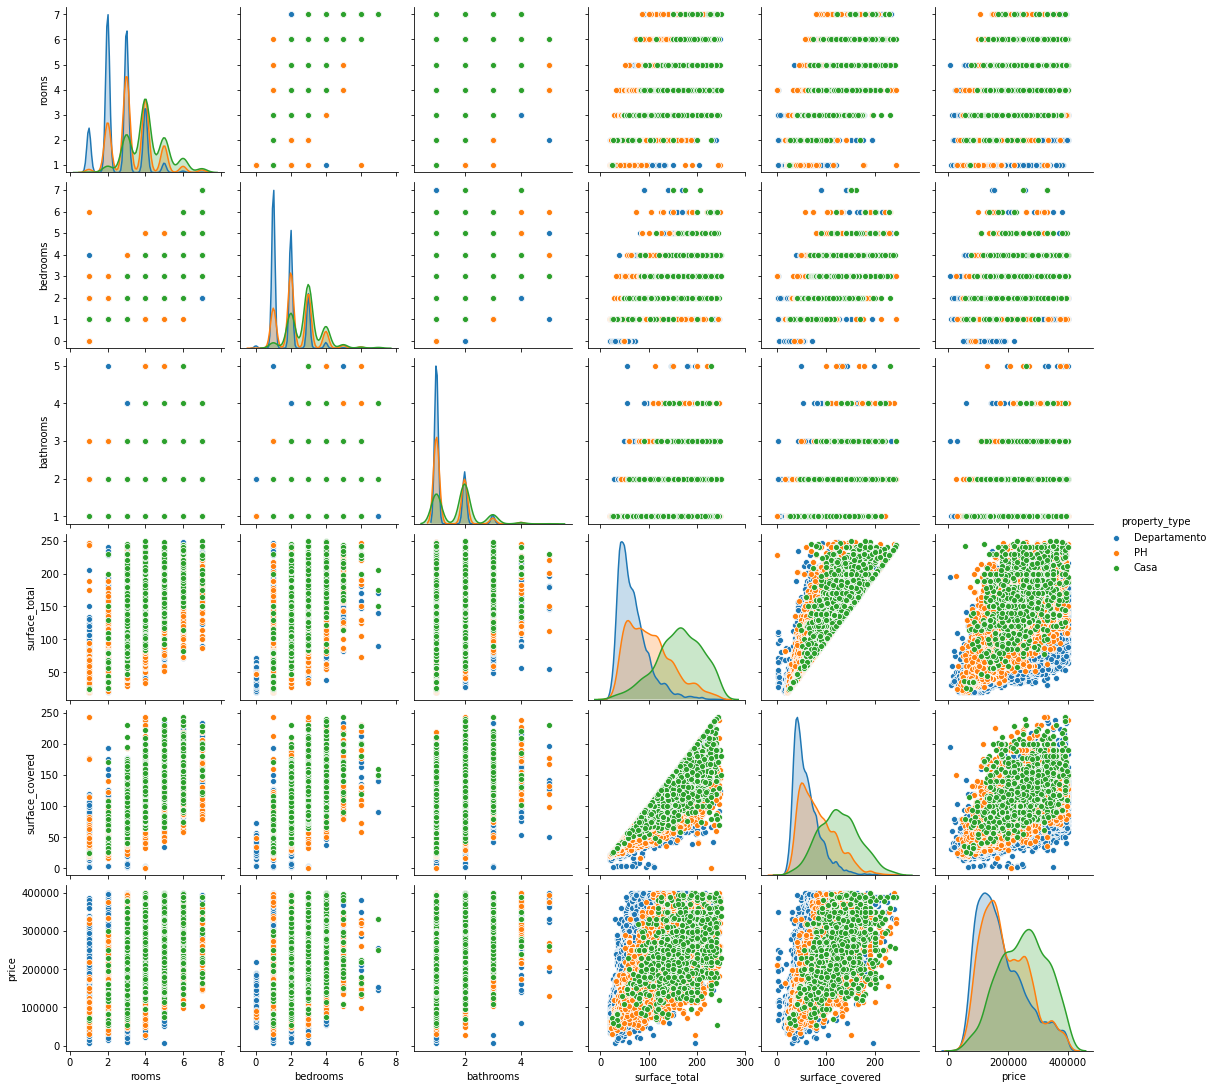

In [55]:
plt.figure(figsize = (40,13))
sns.pairplot(data = df_cf, hue = 'property_type')
plt.savefig('pairplot_df_cf.png')
plt.show()

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [56]:
df_cf.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.937570,0.522309,0.746348,0.802531,0.594048
bedrooms,0.937570,1.000000,0.530831,0.733287,0.795420,0.577219
bathrooms,0.522309,0.530831,1.000000,0.566186,0.612489,0.594236
surface_total,0.746348,0.733287,0.566186,1.000000,0.912690,0.702808
surface_covered,0.802531,0.795420,0.612489,0.912690,1.000000,0.724158
price,0.594048,0.577219,0.594236,0.702808,0.724158,1.000000


<p style="font-size:20px">A partir de los valores de correlación vistos en la tabla y analizando el pairplot, se puede ver que las mejores variables para predecir el precio son <b><i>surface_total</b></i> y <b><i>surface_covered</b></i> por ser las de mayor correlación. Además se puede ver muy buena correlación entre ellas, como así también entre <b><i>rooms</b></i> y <b><i>bedrooms</b></i>. <br>Esto podría ser analizado con mayor profundidad ya que si dos variables tienen tan alta correlación, ¿Es realmente necesario usar ambas para hacer la predicción?</p>

In [58]:
df_cf.shape

(68470, 10)

### Desafío 2.1
<p style="font-size:20px">Como desafío, me propongo observar el precio promedio por $m^{2}$ de <b><i>sup_total</b></i> de las propiedades de nuestro set de datos analizado. Para esto voy a implementar el uso de la librería <b><i>Geopandas</b></i> para así poder visualizarlo de una forma más amigable para un posible usuario.</p>

In [59]:
import geopandas as gpd

<p style="font-size:20px">Descargo un shapefile de la Ciudad de Buenos Aires desde el sitio oficial del gobierno: https://data.buenosaires.gob.ar/dataset/barrios.</p>

In [60]:
barrios = gpd.read_file('barrios-zip/barrios_badata.shp')
type(barrios)

geopandas.geodataframe.GeoDataFrame

In [61]:
barrios.head()

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"POLYGON ((100961.338 103691.974, 100884.721 10..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO,"POLYGON ((99791.104 103628.888, 99787.132 1036..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO,"POLYGON ((103627.714 103487.358, 103517.533 10..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO,"POLYGON ((97128.440 101597.513, 97112.315 1015..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"POLYGON ((104625.143 101679.935, 104629.994 10..."


<p style="font-size:20px">Así se ve el archivo shp en principio.</p>

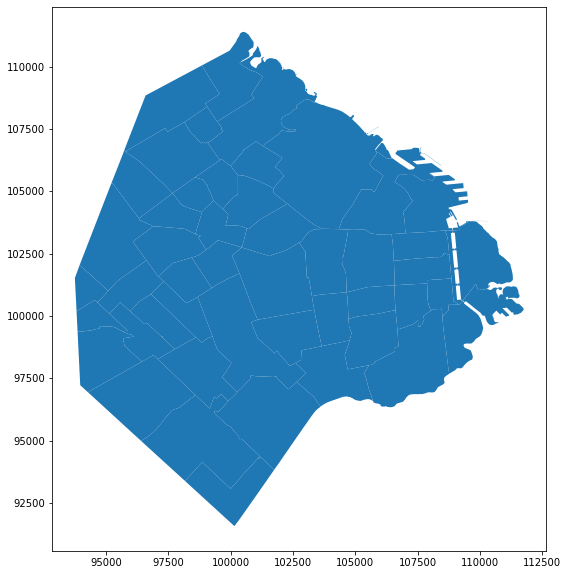

In [62]:
barrios.plot(figsize = (10,10))

<p style="font-size:20px">Ahora creo un Dataframe con los valores promedio de <b>precios</b> y de <b>superficie total</b> por barrio para luego crear una columna con el promedio de $m^{2}$.</p>

In [63]:
df_cf_mprice = pd.DataFrame(df_cf.groupby('l3').mean().price)
df_cf_msup = pd.DataFrame(df_cf.groupby('l3').mean().surface_total)

In [64]:
df_cf_m = df_cf_mprice.join(df_cf_msup.surface_total)

In [65]:
df_cf_m['precio_m2_promedio'] = df_cf_m.price/df_cf_m.surface_total
df_cf_m.head()

,price,surface_total,precio_m2_promedio
l3,,,
Abasto,172282.459596,72.755051,2367.979383
Agronomía,165226.260563,78.915493,2093.711315
Almagro,173429.534739,74.613774,2324.363516
Balvanera,138020.361024,67.978895,2030.341333
Barracas,182811.510417,84.687500,2158.659902


<p style="font-size:20px">Voy a poner todos los barrios en mayúscula para poder compararlos contra el dataframe obtenido a partir del shapefile.</p>

In [66]:
df_cf_m.index = df_cf_mprice.index.str.upper()
df_cf_m.head()

,price,surface_total,precio_m2_promedio
l3,,,
ABASTO,172282.459596,72.755051,2367.979383
AGRONOMÍA,165226.260563,78.915493,2093.711315
ALMAGRO,173429.534739,74.613774,2324.363516
BALVANERA,138020.361024,67.978895,2030.341333
BARRACAS,182811.510417,84.687500,2158.659902


In [67]:
lista = np.zeros(len(barrios.BARRIO))
barrios['precio_m2_promedio'] = lista
barrios = barrios.sort_values('BARRIO')
barrios.head()

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry,precio_m2_promedio
27,AGRONOMIA,15.0,6556.167772,2.122169e+06,BARRIO,"POLYGON ((98732.576 103788.842, 98662.518 1035...",0.0
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"POLYGON ((104625.143 101679.935, 104629.994 10...",0.0
24,BALVANERA,3.0,8375.821811,4.342280e+06,BARRIO,"POLYGON ((104713.283 103467.380, 104862.315 10...",0.0
29,BARRACAS,4.0,12789.791771,7.953453e+06,BARRIO,"POLYGON ((108524.283 99590.567, 108529.400 995...",0.0
43,BELGRANO,13.0,20609.775397,7.999240e+06,BARRIO,"POLYGON ((101168.833 110389.866, 101160.528 11...",0.0


In [68]:
for i in range(len(barrios.BARRIO)):
    for k in range(len(df_cf_m)):
        if barrios.BARRIO[i] == df_cf_m.index[k]:
            barrios['precio_m2_promedio'][i] = df_cf_m.precio_m2_promedio[k]
            
barrios

<ipython-input-68-aac7bdb90390>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrios['precio_m2_promedio'][i] = df_cf_m.precio_m2_promedio[k]


,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry,precio_m2_promedio
27,AGRONOMIA,15.0,6556.167772,2.122169e+06,BARRIO,"POLYGON ((98732.576 103788.842, 98662.518 1035...",0.000000
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"POLYGON ((104625.143 101679.935, 104629.994 10...",2324.363516
24,BALVANERA,3.0,8375.821811,4.342280e+06,BARRIO,"POLYGON ((104713.283 103467.380, 104862.315 10...",2030.341333
29,BARRACAS,4.0,12789.791771,7.953453e+06,BARRIO,"POLYGON ((108524.283 99590.567, 108529.400 995...",2158.659902
43,BELGRANO,13.0,20609.775397,7.999240e+06,BARRIO,"POLYGON ((101168.833 110389.866, 101160.528 11...",3014.529739
47,BOCA,4.0,20060.003939,5.036240e+06,BARRIO,"POLYGON ((109996.081 99938.771, 109998.062 999...",1664.902169
13,BOEDO,5.0,6602.510266,2.609851e+06,BARRIO,"POLYGON ((104724.268 99878.364, 104724.271 998...",1928.052288
5,CABALLITO,6.0,10990.964471,6.851029e+06,BARRIO,"POLYGON ((102998.760 102464.802, 103002.947 10...",2423.752968
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"POLYGON ((100961.338 103691.974, 100884.721 10...",2279.057388
21,COGHLAN,12.0,4627.563131,1.279951e+06,BARRIO,"POLYGON ((99162.979 107007.864, 99113.708 1069...",2623.364394


<p style="font-size:20px">Veo que hay algunos valores de <b><i>precio_m2_promedio</b></i> en 0, por lo cual voy a analizarlos con un poco más de profundidad.</p>

In [69]:
barrios[barrios.precio_m2_promedio == 0]

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry,precio_m2_promedio
27,AGRONOMIA,15.0,6556.167772,2.122169e+06,BARRIO,"POLYGON ((98732.576 103788.842, 98662.518 1035...",0.0
11,CONSTITUCION,1.0,6326.841375,2.101995e+06,BARRIO,"POLYGON ((108044.572 100214.911, 107949.956 10...",0.0
32,NUEVA POMPEYA,4.0,11033.510302,4.951511e+06,BARRIO,"POLYGON ((104683.884 97906.088, 104693.797 978...",0.0
42,SAN NICOLAS,1.0,6548.084754,2.289008e+06,BARRIO,"POLYGON ((108748.549 102668.942, 108766.267 10...",0.0
25,VILLA GRAL. MITRE,11.0,6290.440561,2.162275e+06,BARRIO,"POLYGON ((99257.174 101135.036, 99236.854 1011...",0.0
36,VILLA PUEYRREDON,12.0,7522.360382,3.303240e+06,BARRIO,"POLYGON ((96329.447 103927.833, 96314.729 1039...",0.0


<p style="font-size:20px">Observando el la información de nuestro dataset analizado, podemos concluir que para los barrios de <b><i>Constitución</b></i>, <b><i>Agronomía</b></i>, <b><i>Villa Pueyrredón</b></i> y <b><i>San Nicolás</b></i>, el problema fue la falta de tildes. Además <b><i>Nueva Pompeya</b></i> figura como <b><i>Pompeya</b></i> y <b><i>Villa Gral Mitre</b></i> como <b><i>Villa General Mitre</b></i></p>

In [70]:
barrios.BARRIO[27] = 'AGRONOMÍA'
barrios.BARRIO[11] = 'CONSTITUCIÓN'
barrios.BARRIO[32] = 'POMPEYA'
barrios.BARRIO[42] = 'SAN NICOLÁS'
barrios.BARRIO[25] = 'VILLA GENERAL MITRE'
barrios.BARRIO[36] = 'VILLA PUEYRREDÓN'

<ipython-input-70-eb5766639709>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrios.BARRIO[27] = 'AGRONOMÍA'
<ipython-input-70-eb5766639709>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrios.BARRIO[11] = 'CONSTITUCIÓN'
<ipython-input-70-eb5766639709>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrios.BARRIO[32] = 'POMPEYA'
<ipython-input-70-eb5766639709>:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [71]:
for i in range(len(barrios.BARRIO)):
    for k in range(len(df_cf_m)):
        if barrios.BARRIO[i] == df_cf_m.index[k]:
            barrios['precio_m2_promedio'][i] = df_cf_m.precio_m2_promedio[k]
            
barrios

<ipython-input-71-aac7bdb90390>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrios['precio_m2_promedio'][i] = df_cf_m.precio_m2_promedio[k]


,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry,precio_m2_promedio
27,AGRONOMÍA,15.0,6556.167772,2.122169e+06,BARRIO,"POLYGON ((98732.576 103788.842, 98662.518 1035...",2093.711315
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"POLYGON ((104625.143 101679.935, 104629.994 10...",2324.363516
24,BALVANERA,3.0,8375.821811,4.342280e+06,BARRIO,"POLYGON ((104713.283 103467.380, 104862.315 10...",2030.341333
29,BARRACAS,4.0,12789.791771,7.953453e+06,BARRIO,"POLYGON ((108524.283 99590.567, 108529.400 995...",2158.659902
43,BELGRANO,13.0,20609.775397,7.999240e+06,BARRIO,"POLYGON ((101168.833 110389.866, 101160.528 11...",3014.529739
47,BOCA,4.0,20060.003939,5.036240e+06,BARRIO,"POLYGON ((109996.081 99938.771, 109998.062 999...",1664.902169
13,BOEDO,5.0,6602.510266,2.609851e+06,BARRIO,"POLYGON ((104724.268 99878.364, 104724.271 998...",1928.052288
5,CABALLITO,6.0,10990.964471,6.851029e+06,BARRIO,"POLYGON ((102998.760 102464.802, 103002.947 10...",2423.752968
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"POLYGON ((100961.338 103691.974, 100884.721 10...",2279.057388
21,COGHLAN,12.0,4627.563131,1.279951e+06,BARRIO,"POLYGON ((99162.979 107007.864, 99113.708 1069...",2623.364394


<p style="font-size:20px">Ya sin ningún valor nulo, procedemos a graficar los barrios con su respectiva media de precios. El archivo que provee el Gobierno de la Ciudad de Buenos Aires contiene 47 barrios mientras que Properati contempla 57, sin embargo solo usaremos los 47 que están delimitados en el mapa.</p>

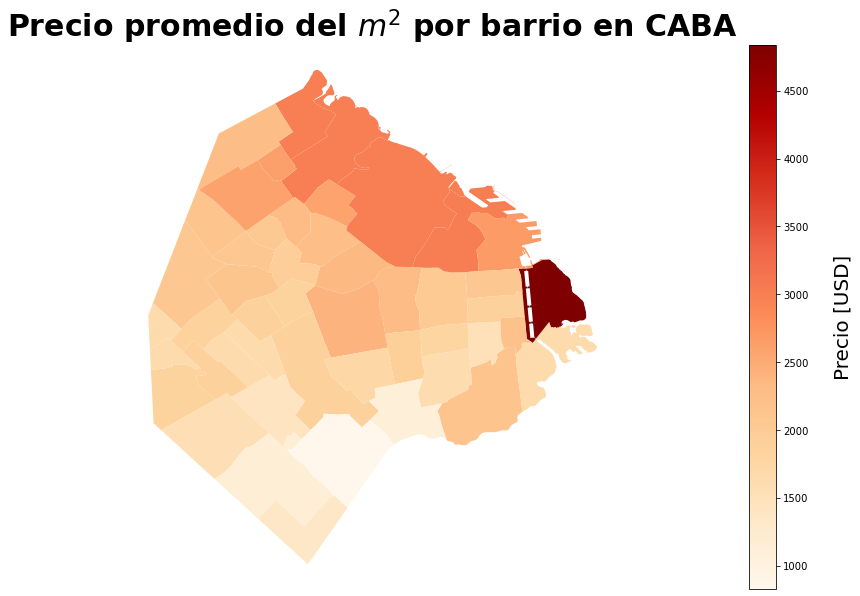

In [72]:
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.pylab import *

ax = barrios.plot(figsize = (15,10), column = 'precio_m2_promedio', cmap = 'OrRd')

plt.title('Precio promedio del $m^{2}$ por barrio en CABA', size = 30, weight=600)

norm = Normalize(vmin=barrios['precio_m2_promedio'].min(), vmax=barrios['precio_m2_promedio'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='OrRd')
n_cmap.set_array([])
cb = ax.get_figure().colorbar(n_cmap)
#cb.ax.set_yticklabels(['100.000', '125.000', '150.000','175.000', '200.000', '225.000', '250.000', '275.000', '300.000'], fontsize = 16)
cb.ax.set_ylabel('Precio [USD]', size = 20, labelpad = 25)
ax.set_axis_off()
plt.axis('equal')
savefig('Precio_metro_2.png')
plt.show()

<p style="font-size:20px">Aunque es una forma visualmente amigable de ver la información, este mapa solo es útil para las personas que conocen la ubicación de cada barrio, lo cual me llevo a hacer algo un poco más interactivo.
<br><br>
❗❗❗Para poder correr correctamente la siguiente sección es necesario tener instalada las extensiones de Jupyter de ipyleaflet y ipywidgets. Además, yo solo pude correrlo en Jupyter Notebooks y no en Jupyter Lab.</p>

In [73]:
from ipyleaflet import Map, GeoData, basemaps, WidgetControl, GeoJSON, LayersControl,basemap_to_tiles
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import json

<p style="font-size:20px">Tuve que escalar las dimensiones del mapa de la capital por que el que provee el gobierno de la ciudad de Buenos Aires tiene valores distintos a los que que maneja la extension de jupyter(Por eso es que el mapa no queda perfectamente ubicado en su lugar real).</p>

In [74]:
# Este bloque escala el mapa cada vez que se corre, por lo que hay que tener cuidado de no hacerlo más de una vez por que sino
# el mapa va a desaparecer. Gracias!
barrios.geometry = barrios.geometry.scale(xfact = 1/90000, yfact=1/105000, zfact=1.0, origin=(-59.575, -35.585))

In [75]:
center = [-34.62,-58.39]
zoom = 11

CABAMap = Map(center = center, zoom = zoom)

geodata = GeoData(geo_dataframe = barrios,
        style={'color': 'black', 'fillColor': 'blue', 'opacity':0.5, 
        'weight':1.9, 'dashArray':'2', 'fillOpacity':0.5},
        hover_style={'fillColor': 'red' , 'fillOpacity': 0.8})

CABAMap.add_layer(geodata)
CABAMap.save('mapa.html')
CABAMap

Map(center=[-34.62, -58.39], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

<p style="font-size:20px"> Al correr este bloque se actualiza el mapa con el cuadro HTML para observar el nombre y precio del metro cuadrado por barrio. Se debe correr primero el bloque de arriba ⬆, luego este bloque, y luego ir al mapa para poder ver la información de cada barrio.</p>

In [76]:
html = HTML('''Información por Barrio''')
html.layout.margin = '0px 20px 20px 20px'
control = WidgetControl(widget=html, position='topright')
CABAMap.add_control(control)

def update_html(feature, **kwargs):
     html.value = '''
     <h3><b>{}</b></h3> 
     <h4>Precio por m<sup>2</sup>: {} usd</h4>
     '''.format(feature['properties']['BARRIO'],
                round(feature['properties']['precio_m2_promedio'],2))
        
geodata.on_hover(update_html)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

In [77]:
df_ml = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df_ml['l2'].value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

In [78]:
df_ml = df_ml[(df_ml['l2'] == 'Capital Federal') & (df_ml['property_type'].isin(['Departamento', 'PH', 'Casa']))]
df_ml.shape

(91485, 19)

In [79]:
df_ml.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [80]:
df_ml = df_ml[(df_ml['surface_total'] <= 1000) & (df_ml['surface_total'] >= 15)]
df_ml.shape

(82405, 19)

In [81]:
df_ml = df_ml[df_ml['price'] <= 4000000]
df_ml.shape

(82373, 19)

In [82]:
df_ml = df_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
df_ml.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [83]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82373 entries, 0 to 146558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            82373 non-null  float64
 1   bedrooms         82373 non-null  float64
 2   bathrooms        81493 non-null  float64
 3   surface_total    82373 non-null  float64
 4   surface_covered  81856 non-null  float64
 5   price            82373 non-null  float64
dtypes: float64(6)
memory usage: 4.4 MB


In [84]:
df_ml = df_ml.dropna()
df_ml.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [85]:
df_ml.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


In [86]:
df_ml.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


In [87]:
df_ml.shape

(81019, 6)

<p style="font-size:20px"> Aplicando todos los filtros llego a 81019 instancias y no a 81021 como indica la consigna. Igualmente voy a evaluar los modelos de Machine Learning primero con estos datos y luego con el dataset analizado en la sección de análisis de datos. <br><br> Voy a usar el <b>RMSE</b> como métrica para la evaluación de los modelos. Decido usarlo ya que el valor es directamente comparable con la variable a predecir, lo cual me da un claro indicio de como esta entrenado el modelo. Además, el <b>RMSE</b> castiga con un mayor valor a los errores más altos, siendo más estricto con los valores outliers que, por ejemplo el <b>MAE</b>. <br>En <i>Root mean square error (RMSE) or mean absolute error (MAE)? (2014)</i> por <b>Tianfeng Chai</b> y </b>R. R. Draxler</b>, explican como el RMSE, es más adecuado que el MAE cuando el error tiene una distribución Gaussiana.</p> 

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [89]:
X = df_ml.drop('price', axis = 1)
y = df_ml.price

In [90]:
#X = np.vstack((df_ml.rooms,df_ml.surface_covered)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


<p style="font-size:20px"> Primero creamos un modelo de Regresión Lineal como benchmark para marcar un punto de partida</p>

In [91]:
lineal_regressor = LinearRegression()

In [92]:
lineal_regressor.fit(X_train, y_train)

LinearRegression()

In [93]:
y_train_pred_lin = lineal_regressor.predict(X_train)
y_test_pred_lin = lineal_regressor.predict(X_test)

In [94]:
rmse_lin_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_lin_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))

In [95]:
print(f'Raíz del error cuadrático medio en Regresión Lineal - Train: {rmse_lin_train}')
print(f'Raíz del error cuadrático medio en Regresión Lineal - Test: {rmse_lin_test}')

Raíz del error cuadrático medio en Regresión Lineal - Train: 199173.83253528475
Raíz del error cuadrático medio en Regresión Lineal - Test: 202449.36540361567


<p style="font-size:20px">Para predecir el <b>precio</b> que tiene una media de 260.000 usd, veo que es un modelo muy general y con muy poca precisión. </p>

<p style="font-size:20px">Creo un modelo de <b>Árbol de Decisión</b> y optimizo su hiperparámetro <b>max_depth</b></p>

In [96]:
# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train_dt = []
lista_rmse_test_dt = []

# Definimos la lista de valores de max_depth que vamos a explorar
# La cantidad de valores de max_depths está ligada a una comparación posterior con otros datos.
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,28,29,30,31,32,35,40]

# Generamos un loop sobre los distintos valores de max_depth 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    dt_regressor = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    dt_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_dt = dt_regressor.predict(X_train)
    rmse_dt_train = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_dt = dt_regressor.predict(X_test)
    rmse_dt_test = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
    
    # Agregar la información a las listas
    lista_rmse_train_dt.append(rmse_dt_train)
    lista_rmse_test_dt.append(rmse_dt_test)

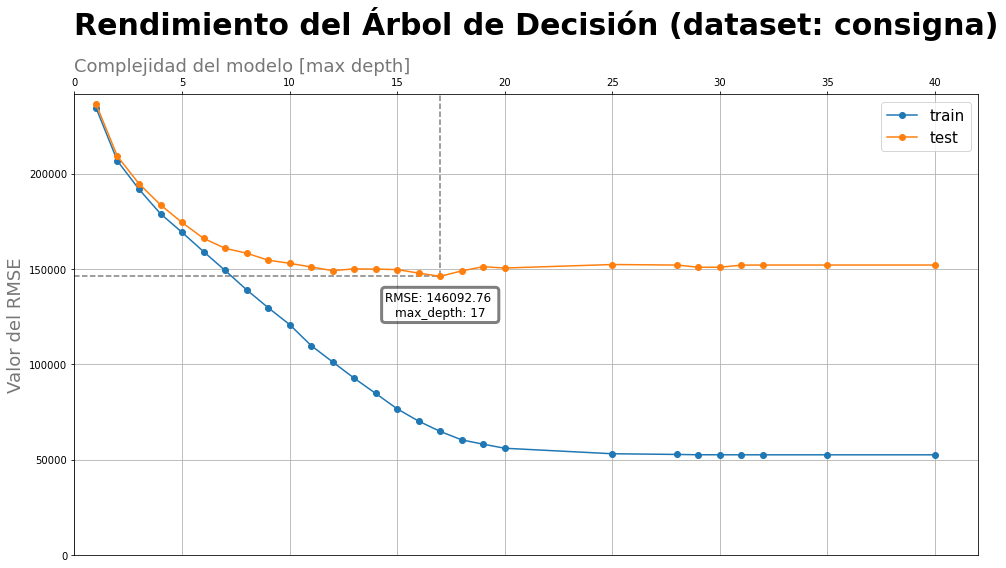

In [97]:
ind_max_depth_optimo = lista_rmse_test_dt.index(min(lista_rmse_test_dt))
max_depth_optimo = max_depths[ind_max_depth_optimo]
rmse_dt_test = lista_rmse_test_dt[ind_max_depth_optimo]
rmse_dt_train = lista_rmse_train_dt[ind_max_depth_optimo]
fig, ax = plt.subplots(figsize = (15,8))


ax.xaxis.set_ticks_position('top')
    
ax.text(0, 1.05, 'Complejidad del modelo [max depth]', transform=ax.transAxes, size=18, color='#777777')
plt.title('Rendimiento del Árbol de Decisión (dataset: consigna)', size = 30, weight=600, pad = 60, loc = 'left')


plt.plot(max_depths, lista_rmse_train_dt,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test_dt,'o-',label='test')
plt.vlines(max_depth_optimo, 
           ymin = lista_rmse_test_dt[ind_max_depth_optimo], 
           ymax = max(lista_rmse_test_dt) + 5000,
           linestyles = 'dashed', 
           colors = 'grey')
plt.hlines(lista_rmse_test_dt[ind_max_depth_optimo], 
           xmin = 0, 
           xmax = max_depth_optimo, 
           linestyles = 'dashed',
           colors = 'grey')

bbox_props1 = dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha = 0.5, lw=3)
rmse = round(lista_rmse_test_dt[ind_max_depth_optimo],2)
plt.text(max_depth_optimo, 
         rmse_dt_test-15000, 
         "RMSE: {} \nmax_depth: {}".format(rmse, max_depth_optimo), 
         ha="center", va="center", 
         size=12, 
         bbox=bbox_props1)

plt.legend(fontsize = 15)
#plt.xlabel('Complejidad del modelo [nro de vecinos]', size = 20)
plt.ylabel('Valor del RMSE', size = 18, color='#777777')
plt.ylim(0,max(lista_rmse_test_dt) + 5000)
plt.xlim(0)
plt.tight_layout()
plt.grid()
plt.savefig('DT_consigna.png')
plt.show()

<p style="font-size:20px">Como primera observación, veo que tiene un <b>RMSE</b> menor que el regresor lineal pero sigue siendo un valor alto comparado con la media del precio.</p>

In [98]:
# Me guardo el modelo optimizado
dt_regressor = DecisionTreeRegressor(max_depth = max_depth_optimo, random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=17, random_state=42)

<p style="font-size:20px">Creo un modelo de <b>KNN</b>, optimizando su hiperparámetro <b>n_neighbors</b>.</p>

In [99]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train_knn = []
lista_rmse_test_knn = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_knn = knn_regressor.predict(X_train)
    rmse_knn_train = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_knn = knn_regressor.predict(X_test)
    rmse_knn_test = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
    
    # Agregar la información a las listas
    lista_rmse_train_knn.append(rmse_knn_train)
    lista_rmse_test_knn.append(rmse_knn_test)


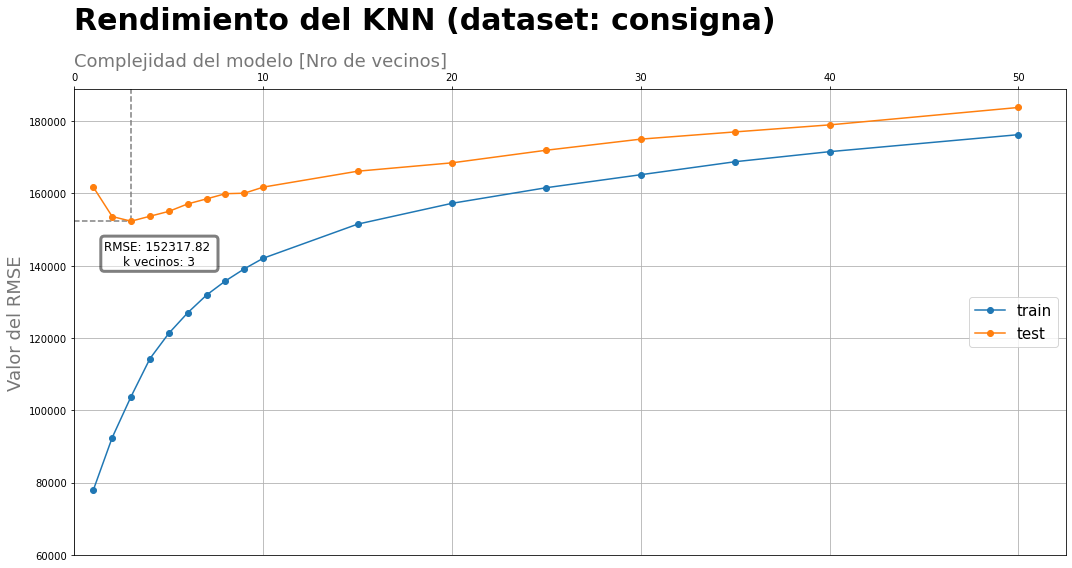

In [100]:
ind_k_vecinos_optimo = lista_rmse_test_knn.index(min(lista_rmse_test_knn))
k_vecinos_optimo = k_vecinos[ind_k_vecinos_optimo]
rmse_knn_test = lista_rmse_test_knn[ind_k_vecinos_optimo]
rmse_knn_train = lista_rmse_train_knn[ind_k_vecinos_optimo]
fig, ax = plt.subplots(figsize = (15,8))


ax.xaxis.set_ticks_position('top')
    
ax.text(0, 1.05, 'Complejidad del modelo [Nro de vecinos]', transform=ax.transAxes, size=18, color='#777777')
plt.title('Rendimiento del KNN (dataset: consigna)', size = 30, weight=600, pad = 60, loc = 'left')


plt.plot(k_vecinos, lista_rmse_train_knn,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test_knn,'o-',label='test')
plt.vlines(k_vecinos_optimo, 
           ymin = rmse_knn_test, 
           ymax = max(lista_rmse_test_knn) + 5000,
           linestyles = 'dashed', 
           colors = 'grey')
plt.hlines(rmse_knn_test, 
           xmin = 0, 
           xmax = k_vecinos_optimo, 
           linestyles = 'dashed',
           colors = 'grey')

bbox_props1 = dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha = 0.5, lw=3)
rmse = round(rmse_knn_test,2)
plt.text(k_vecinos_optimo + 1.5, 
         lista_rmse_test_knn[ind_k_vecinos_optimo]-9000, 
         "RMSE: {} \nk vecinos: {}".format(rmse, k_vecinos_optimo), 
         ha="center", va="center", 
         size=12, 
         bbox=bbox_props1)

plt.legend(fontsize = 15, loc = 'center right')
#plt.xlabel('Complejidad del modelo [nro de vecinos]', size = 20)
plt.ylabel('Valor del RMSE', size = 18, color='#777777')
plt.ylim(60000,max(lista_rmse_test_knn) + 5000)
plt.xlim(0)
plt.tight_layout()
plt.grid()
plt.savefig('KNN_consigna.png')
plt.show()

<p style="font-size:20px">Acá obtengo un valor de <b>RMSE</b> mayor al del modelo de <b>Árbol de decisión</b>.</p>

In [101]:
#Me guardo el modelo optimizado
knn_regressor = KNeighborsRegressor(n_neighbors = k_vecinos_optimo)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [102]:
print(f'Raíz del error cuadrático medio en Regresión Lineal - Train: {rmse_lin_train}')
print(f'Raíz del error cuadrático medio en Regresión Lineal - Test: {rmse_lin_test}')
print(f'Raíz del error cuadrático medio en Árbol de Decisión - Train: {rmse_dt_train}')
print(f'Raíz del error cuadrático medio en Árbol de Decisión - Test: {rmse_dt_test}')
print(f'Raíz del error cuadrático medio en KNN - Train: {rmse_knn_train}')
print(f'Raíz del error cuadrático medio en KNN - Test: {rmse_knn_test}')
    

Raíz del error cuadrático medio en Regresión Lineal - Train: 199173.83253528475
Raíz del error cuadrático medio en Regresión Lineal - Test: 202449.36540361567
Raíz del error cuadrático medio en Árbol de Decisión - Train: 64721.0697732051
Raíz del error cuadrático medio en Árbol de Decisión - Test: 146092.75848556007
Raíz del error cuadrático medio en KNN - Train: 103804.20852724434
Raíz del error cuadrático medio en KNN - Test: 152317.82229037234


Resumen de los modelos con el dataset de la consigna
Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.833
Raíz del error cuadrático medio en Test: 202449.365


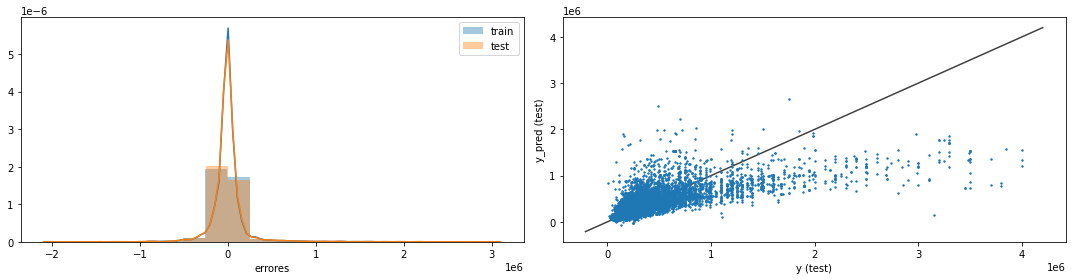

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 64721.07
Raíz del error cuadrático medio en Test: 146092.758


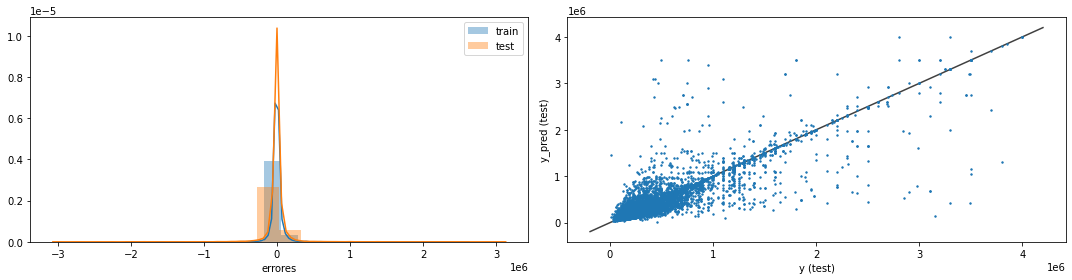

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 103804.209
Raíz del error cuadrático medio en Test: 152317.822


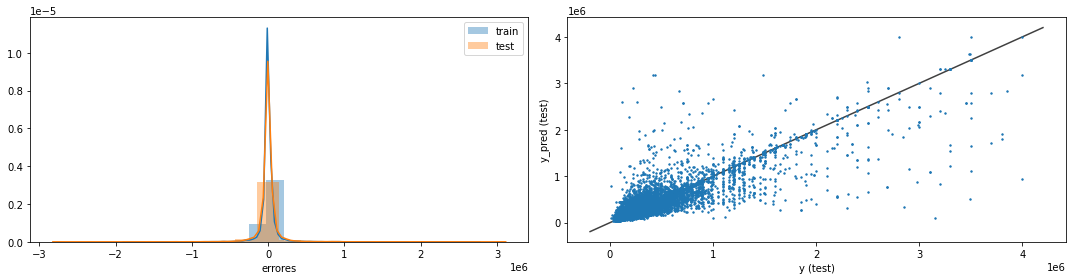

In [103]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']
print('Resumen de los modelos con el dataset de la consigna')
for i, model in enumerate([lineal_regressor, dt_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {round(rmse_train,3)}')
    print(f'Raíz del error cuadrático medio en Test: {round(rmse_test,3)}')
    
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

<p style="font-size:20px">Luego de ver los valores de <b>RMSE</b> obtenidos a partir de los modelos con los hiperparámetros optimizados, se puede ver que son altos si se tiene en cuenta el rango de precios visualizado al aplicar el cuantil 0.90 en el análisis de los datos y la media de la variable <b>price</b> que es de 260.000 usd. Igualmente, para este dataset el modelo elegido sería el <b>Árbol de decisión</b> ya que tiene el menor <b>RMSE</b> en test de los tres. <br><br>
Siempre que se ve un análisis del mercado inmobiliario, las principales variables por las que diferencian el precio de las propiedades son el <b><i>tipo de propiedad</b></i>, la <b><i>superficie</b></i> y también la <b><i>ubicación o barrio</b></i> del inmueble.<br><br>
Vamos a entrenar los modelos con el dataset generado en el análisis de los datos (Al cual voy a llamar <b>dataset personal</b>) pero agregando variables dummy para poder tener en cuenta el <b><i>barrio ['l3']</b></i> de la propiedad y el <b><i>tipo de la propiedad ['property_type']</b></i> en la predicción.</p>

In [104]:
dummy_barrios = pd.get_dummies(df_cf['l3'])
dummy_ptype = pd.get_dummies(df_cf['property_type'])

In [105]:
df_cf_dummy = pd.concat([df_cf,dummy_barrios, dummy_ptype], axis = 1)
df_cf_dummy.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,...,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,Casa,Departamento,PH
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,...,0,0,0,0,0,0,0,0,1,0
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,espectacular ph reciclado en boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,...,0,0,0,0,0,0,0,0,0,1
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,depto.tipo casa de 2 ambientes en venta en pal...,"2 ambienets amplio , excelente estado , patio ...",PH,...,0,0,0,0,0,0,0,0,0,1
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,costa rica 5800 / palermo hollywood / venta ph...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,...,0,0,0,0,0,0,0,0,0,1
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,depto.tipo casa de 2 ambientes en venta en vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,...,0,0,0,0,0,0,0,0,0,1


In [106]:
df_cf_dummy.dropna(inplace = True)

In [107]:
X_2 = df_cf_dummy.drop(['price', 'l3', 'title', 'description', 'property_type'], axis = 1)
y_2 = df_cf_dummy.price

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 42)

<p style="font-size:20px">Primero voy a crear un modelo de <b>regresión lineal</b> y lo voy a entrenar con el <b>dataset personal</b>.</p>

In [108]:
lineal_regressor_2 = LinearRegression()
lineal_regressor_2.fit(X_train_2, y_train_2)
y_train_pred_lin_2 = lineal_regressor_2.predict(X_train_2)
y_test_pred_lin_2 = lineal_regressor_2.predict(X_test_2)
rmse_lin_train_2 = np.sqrt(mean_squared_error(y_train_2, y_train_pred_lin_2))
rmse_lin_test_2 = np.sqrt(mean_squared_error(y_test_2, y_test_pred_lin_2))
print(f'Raíz del error cuadrático medio en Regresión Lineal - Train: {round(rmse_lin_train_2,3)}')
print(f'Raíz del error cuadrático medio en Regresión Lineal - Test: {round(rmse_lin_test_2,3)}')

Raíz del error cuadrático medio en Regresión Lineal - Train: 41034.025
Raíz del error cuadrático medio en Regresión Lineal - Test: 41548.099


<p style="font-size:20px">Ya puedo observar una mejora significativa en el valor de <b>RMSE</b> obtenido.</p>

<p style="font-size:20px">Ahora creo un modelo de <b>Árbol de Decisión</b> y optimizo su hiperparámetro <b>max_depth</b>, para entrenar con el <b>dataset personal</b>.</p>

In [109]:
# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train_dt_2 = []
lista_rmse_test_dt_2 = []

# Definimos la lista de valores de max_depth que vamos a explorar 
# Luego de ver que 30 era el max_depth óptimo, le agrego dos valores mayores y dos menores para asegurarnos que es un mínimo total y no local
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,41,42,45,50]

# Generamos un loop sobre los distintos valores de max_depth 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    dt_regressor = DecisionTreeRegressor(max_depth = max_depth)
    
    # Entrenar el modelo
    dt_regressor.fit(X_train_2, y_train_2)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_dt = dt_regressor.predict(X_train_2)
    rmse_dt_train_2 = np.sqrt(mean_squared_error(y_train_2, y_train_pred_dt))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_dt = dt_regressor.predict(X_test_2)
    rmse_dt_test_2 = np.sqrt(mean_squared_error(y_test_2, y_test_pred_dt))
    
    # Agregar la información a las listas
    lista_rmse_train_dt_2.append(rmse_dt_train_2)
    lista_rmse_test_dt_2.append(rmse_dt_test_2)

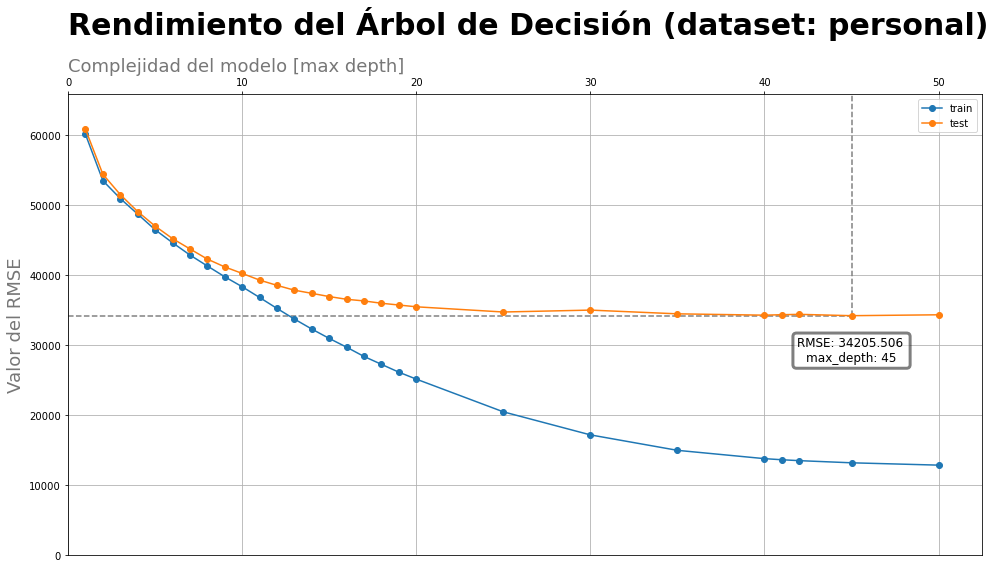

In [110]:
ind_max_depth_optimo_2 = lista_rmse_test_dt_2.index(min(lista_rmse_test_dt_2))
max_depth_optimo_2 = max_depths[ind_max_depth_optimo_2]
rmse_dt_test_2 = lista_rmse_test_dt_2[ind_max_depth_optimo_2]
rmse_dt_train_2 = lista_rmse_train_dt_2[ind_max_depth_optimo_2]
fig, ax = plt.subplots(figsize = (15,8))


ax.xaxis.set_ticks_position('top')
    
ax.text(0, 1.05, 'Complejidad del modelo [max depth]', transform=ax.transAxes, size=18, color='#777777')
plt.title('Rendimiento del Árbol de Decisión (dataset: personal)', size = 30, weight=600, pad = 60, loc = 'left')


plt.plot(max_depths, lista_rmse_train_dt_2,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test_dt_2,'o-',label='test')
plt.vlines(max_depth_optimo_2, 
           ymin = rmse_dt_test_2, 
           ymax = max(lista_rmse_test_dt_2) + 5000,
           linestyles = 'dashed', 
           colors = 'grey')
plt.hlines(rmse_dt_test_2, 
           xmin = 0, 
           xmax = max_depth_optimo_2, 
           linestyles = 'dashed',
           colors = 'grey')

bbox_props1 = dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha = 0.5, lw=3)
plt.text(max_depth_optimo_2, 
         rmse_dt_test_2-5000, 
         "RMSE: {} \nmax_depth: {}".format(round(rmse_dt_test_2,3), max_depth_optimo_2), 
         ha="center", va="center", 
         size=12, 
         bbox=bbox_props1)

plt.legend()
#plt.xlabel('Complejidad del modelo [nro de vecinos]', size = 20)
plt.ylabel('Valor del RMSE', size = 18, color='#777777')
plt.ylim(0,max(lista_rmse_test_dt_2) + 5000)
plt.xlim(0)
plt.tight_layout()
plt.grid()
plt.show()

<p style="font-size:20px">Observo que el modelo de <b>Árbol de decisión</b> tiene un <b>RMSE</b> menor que el de <b>Regresión lineal</b> en test. (Le agregué valores cercanos de <b>max_depth</b> al vector de pruebas para asegurarme que sea un mínimo total y no local)</p>

In [111]:
# Me guardo el modelo optimizado
dt_regressor_2 = DecisionTreeRegressor(max_depth = max_depth_optimo_2, random_state=42)
dt_regressor_2.fit(X_train_2, y_train_2)

DecisionTreeRegressor(max_depth=45, random_state=42)

<p style="font-size:20px">Por último creo un modelo de <b>KNN</b> y optimizo su hiperparámetro <b>n_neighbors</b>, para entrenar con el <b>dataset personal</b>.</p>

In [112]:
# Este bloque tarda un ratito en correr pero corre bien!

# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train_knn_2 = []
lista_rmse_test_knn_2 = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train_2, y_train_2)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_knn = knn_regressor.predict(X_train_2)
    rmse_knn_train_2 = np.sqrt(mean_squared_error(y_train_2, y_train_pred_knn))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_knn = knn_regressor.predict(X_test_2)
    rmse_knn_test_2 = np.sqrt(mean_squared_error(y_test_2, y_test_pred_knn))
    
    # Agregar la información a las listas
    lista_rmse_train_knn_2.append(rmse_knn_train_2)
    lista_rmse_test_knn_2.append(rmse_knn_test_2)

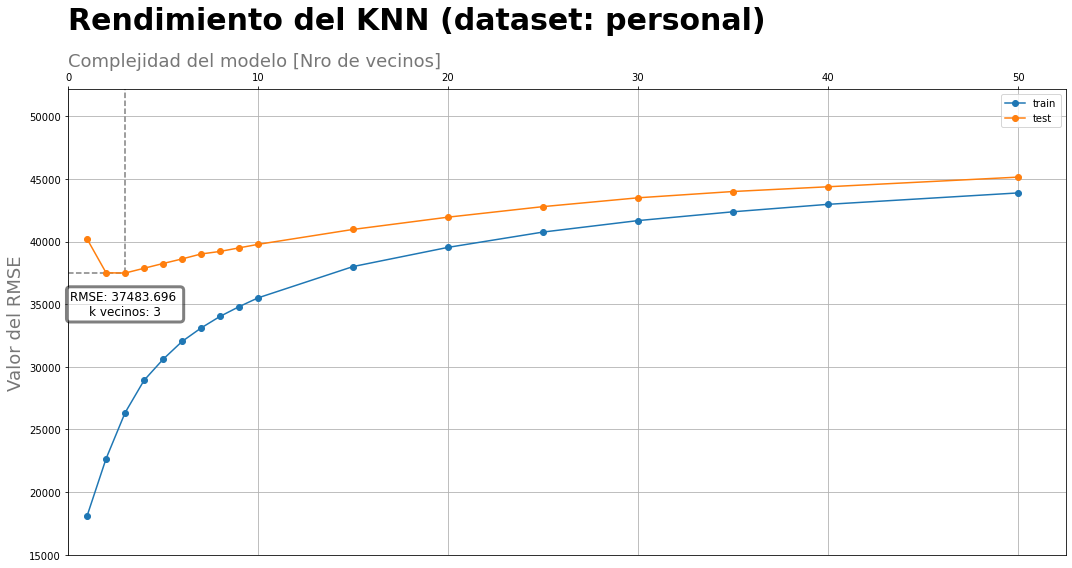

In [113]:
ind_k_vecinos_optimo_2 = lista_rmse_test_knn_2.index(min(lista_rmse_test_knn_2))
k_vecinos_optimo_2 = k_vecinos[ind_k_vecinos_optimo_2]
rmse_knn_test_2 = lista_rmse_test_knn_2[ind_k_vecinos_optimo_2]
rmse_knn_train_2 = lista_rmse_train_knn_2[ind_k_vecinos_optimo_2]
fig, ax = plt.subplots(figsize = (15,8))


ax.xaxis.set_ticks_position('top')
    
ax.text(0, 1.05, 'Complejidad del modelo [Nro de vecinos]', transform=ax.transAxes, size=18, color='#777777')
plt.title('Rendimiento del KNN (dataset: personal)', size = 30, weight=600, pad = 60, loc = 'left')


plt.plot(k_vecinos, lista_rmse_train_knn_2,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test_knn_2,'o-',label='test')
plt.vlines(k_vecinos_optimo_2, 
           ymin = rmse_knn_test_2, 
           ymax = max(lista_rmse_test_knn_2)+7000,
           linestyles = 'dashed', 
           colors = 'grey')
plt.hlines(rmse_knn_test_2, 
           xmin = 0, 
           xmax = k_vecinos_optimo_2, 
           linestyles = 'dashed',
           colors = 'grey')

bbox_props1 = dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha = 0.5, lw=3)

plt.text(k_vecinos_optimo_2, 
         lista_rmse_test_knn_2[ind_k_vecinos_optimo_2]-2500, 
         "RMSE: {} \nk vecinos: {}".format(round(rmse_knn_test_2,3), k_vecinos_optimo_2), 
         ha="center", va="center", 
         size=12, 
         bbox=bbox_props1)

plt.legend()
#plt.xlabel('Complejidad del modelo [nro de vecinos]', size = 20)
plt.ylabel('Valor del RMSE', size = 18, color='#777777')
plt.ylim(15000,max(lista_rmse_test_knn_2) + 7000)
plt.xlim(0)
plt.tight_layout()
plt.grid()
plt.show()

<p style="font-size:20px">Con el modelo de <b>KNN</b> obtengo un valor de <b>RMSE</b> muy similar al del modelo de <b>Árbol de decisión</b>, ambos mucho menores que los modelos entrenados con el dataset de la consigna.</p> 

In [114]:
# Me guardo el modelo optimizado
knn_regressor_2 = KNeighborsRegressor(n_neighbors = k_vecinos_optimo_2)
knn_regressor_2.fit(X_train_2, y_train_2)

KNeighborsRegressor(n_neighbors=3)

In [115]:
print('Modelo --> Árbol de Decisión')
print('RMSE en test con datos de la consigna:', round(rmse_dt_test,3))
print('RMSE en train con datos de la consigna:', round(rmse_dt_train,3))
print('RMSE en test con datos del dataset personal:', round(rmse_dt_test_2,3))
print('RMSE en train con datos del dataset personal:', round(rmse_dt_train_2,3))
print('Modelo --> KNN')
print('RMSE en test con datos de la consigna:', round(rmse_knn_test,3))
print('RMSE en train con datos de la consigna:', round(rmse_knn_train,3))
print('RMSE en test con datos del dataset personal:', round(rmse_knn_test_2,3))
print('RMSE en train con datos del dataset personal:', round(rmse_knn_train_2,3))

Modelo --> Árbol de Decisión
RMSE en test con datos de la consigna: 146092.758
RMSE en train con datos de la consigna: 64721.07
RMSE en test con datos del dataset personal: 34205.506
RMSE en train con datos del dataset personal: 13160.717
Modelo --> KNN
RMSE en test con datos de la consigna: 152317.822
RMSE en train con datos de la consigna: 103804.209
RMSE en test con datos del dataset personal: 37483.696
RMSE en train con datos del dataset personal: 26336.371


Resumen de los modelos con el dataset personal
Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 41034.025
Raíz del error cuadrático medio en Test: 41548.099


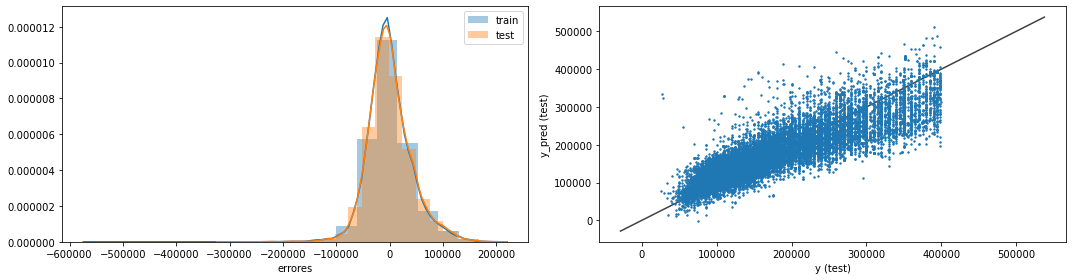

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 13160.344
Raíz del error cuadrático medio en Test: 34311.317


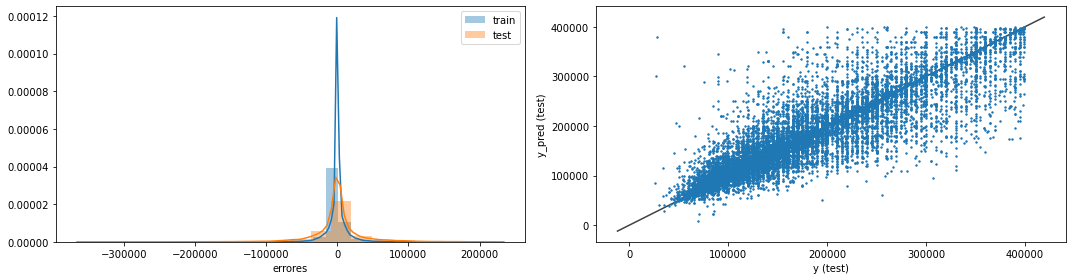

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 26336.371
Raíz del error cuadrático medio en Test: 37483.696


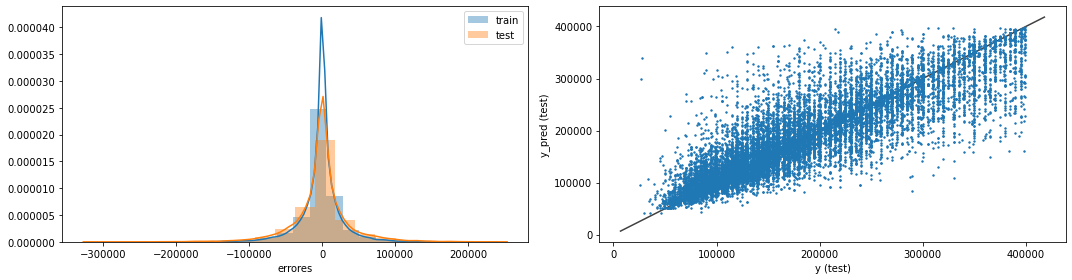

In [116]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']
print('Resumen de los modelos con el dataset personal')
for i, model in enumerate([lineal_regressor_2, dt_regressor_2, knn_regressor_2]):
    y_train_pred = model.predict(X_train_2)
    y_test_pred = model.predict(X_test_2)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train_2, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test_2, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {round(rmse_train,3)}')
    print(f'Raíz del error cuadrático medio en Test: {round(rmse_test,3)}')
    
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train_2 - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test_2 - y_test_pred, bins = 20, label = 'test')
    plt.ticklabel_format(style='plain', axis='y')
    #plt.ticklabel_format(style='sci', axis='x')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test_2,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

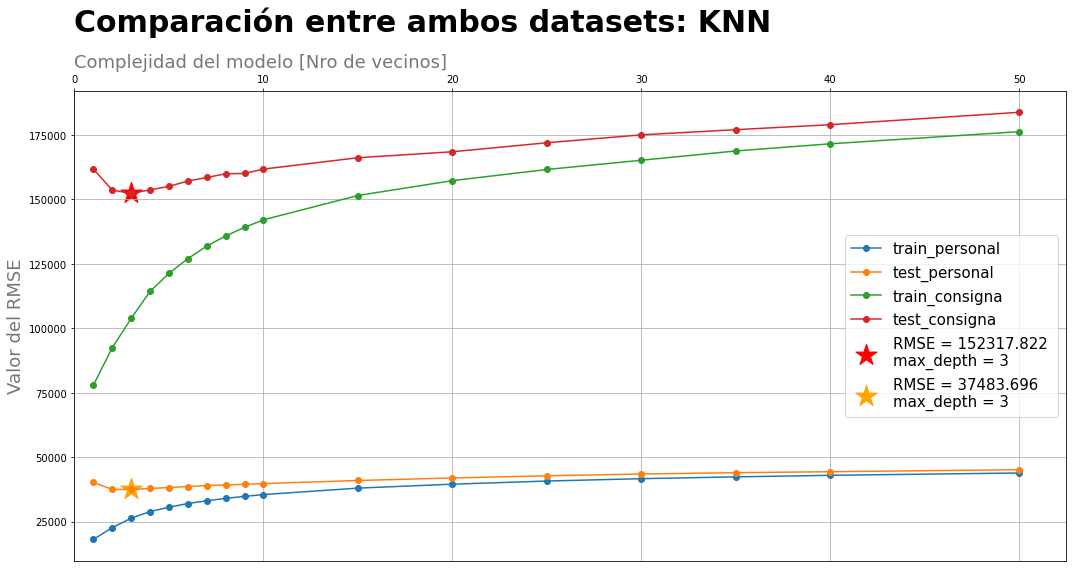

In [117]:
fig, ax = plt.subplots(figsize = (15,8))


ax.xaxis.set_ticks_position('top')
    
ax.text(0, 1.05, 'Complejidad del modelo [Nro de vecinos]', transform=ax.transAxes, size=18, color='#777777')
plt.title('Comparación entre ambos datasets: KNN', size = 30, weight=600, pad = 60, loc = 'left')


plt.plot(k_vecinos, lista_rmse_train_knn_2,'o-',label='train_personal' )
plt.plot(k_vecinos, lista_rmse_test_knn_2,'o-',label='test_personal')
plt.plot(k_vecinos, lista_rmse_train_knn,'o-',label='train_consigna' )
plt.plot(k_vecinos, lista_rmse_test_knn,'o-',label='test_consigna')
plt.scatter(k_vecinos_optimo,rmse_knn_test, s = 500, color = 'red', marker = '*', label = 'RMSE = {} \nmax_depth = {} '.format(round(rmse_knn_test,3),k_vecinos_optimo))
plt.scatter(k_vecinos_optimo_2,rmse_knn_test_2, s = 500, color = 'orange', marker = '*', label = 'RMSE = {} \nmax_depth = {} '.format(round(rmse_knn_test_2,3),k_vecinos_optimo_2))

plt.legend(loc = 'center right', fontsize = 15)
#plt.xlabel('Complejidad del modelo [nro de vecinos]', size = 20)
plt.ylabel('Valor del RMSE', size = 18, color='#777777')
#plt.ylim(15000,max(lista_rmse_test_knn_2) + 7000)
plt.xlim(0)
plt.tight_layout()
plt.grid()
plt.show()

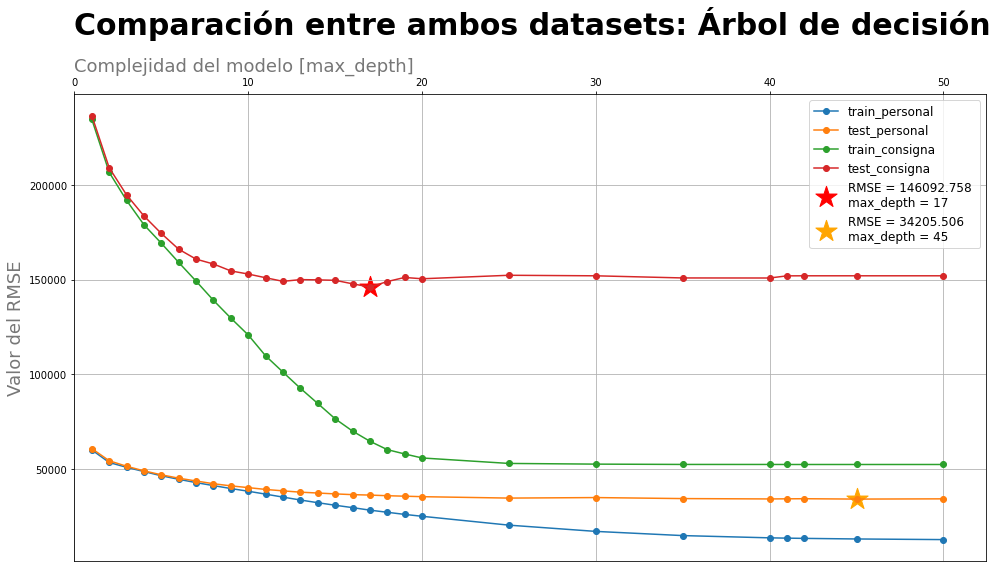

In [118]:
fig, ax = plt.subplots(figsize = (15,8))


ax.xaxis.set_ticks_position('top')
    
ax.text(0, 1.05, 'Complejidad del modelo [max_depth]', transform=ax.transAxes, size=18, color='#777777')
plt.title('Comparación entre ambos datasets: Árbol de decisión', size = 30, weight=600, pad = 60, loc = 'left')


plt.plot(max_depths, lista_rmse_train_dt_2,'o-',label='train_personal' )
plt.plot(max_depths, lista_rmse_test_dt_2,'o-',label='test_personal')
plt.plot(max_depths, lista_rmse_train_dt,'o-',label='train_consigna' )
plt.plot(max_depths, lista_rmse_test_dt,'o-',label='test_consigna')
plt.scatter(max_depth_optimo,rmse_dt_test, s = 500, color = 'red', marker = '*', label = 'RMSE = {} \nmax_depth = {} '.format(round(rmse_dt_test,3),max_depth_optimo))
plt.scatter(max_depth_optimo_2,rmse_dt_test_2, s = 500, color = 'orange', marker = '*', label = 'RMSE = {} \nmax_depth = {} '.format(round(rmse_dt_test_2,3),max_depth_optimo_2))

plt.legend(loc = 'upper right', fontsize = 12)
#plt.xlabel('Complejidad del modelo [nro de vecinos]', size = 20)
plt.ylabel('Valor del RMSE', size = 18, color='#777777')
#plt.ylim(15000,max(lista_rmse_test_knn_2) + 7000)
plt.xlim(0)
plt.tight_layout()
plt.grid()
plt.savefig('DT_comparacion.png')
plt.show()

<p style="font-size:20px">Viendo las comparaciones entre los modelos y entre los datasets, se puede concluir que las mejores predicciones se realizan usando un modelo de <b>Árbol de decisón</b> en el <b>dataset personal</b>. Sin embargo, un error de 34.199 usd sigue siendo un valor grande. Poniéndome en el lugar del cliente ese valor hace mucha diferencia y podría torcer el curso de una decisión de compra solamente por tener una predicción alejada de la realidad. <br><br>
Es por esto que el análisis de datos no fue del todo completo o habría que tomar en consideración más variables para poder obtener resultados satisfactorios.<br><br>
Algo para tener en cuenta es que la información utilizada para este proyecto son publicaciones de las cuales no conocemos su desenlace, es decir, si se termino concretando la operación. Esto significa que pueden haber habido sobreprecios o precios inferiores a lo que en realidad correspondería para esa propiedad, lo cual podría estar introduciendo tendencias erroneas a la variable precio.<br>
Una propuesta para esto podría ser que se agregue una columna al dataset que indique si esa operación fue concretada y hasta cómo fue variando el precio desde su publicación hasta su venta o alquiler.</p> 